In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_excel("France 2023-2024-2025January.xlsx")
df

,Model Name,Period,Noise Level Class,RUN Time,En.Cons.100cy,En.EFF.Class,Auto Door Open,Color,Comm. Protocols,Constr.2,...,Revenue,Revenue Share,Units,Units Share,Average Price,Price Index,Selling Shops,Turnover Share Units,Turnover Share Revenue,First Activity
0,BEKO BLVI70F,Jan. 2023,C,210,94,E,NO,not Applicable,NOT APPLICABLE,BUILT IN/UNDER,...,979461.820,0.0173,3528.000,0.0341,277.625,51,342.000,0.2462,0.1649,2022-11-20
1,CANDY CDIN 2D350PB,Jan. 2023,C,230,93,E,n.a.,not Applicable,BT+WIFI,BUILT IN/UNDER,...,597809.268,0.0106,1935.894,0.0187,308.803,56,250.829,0.1688,0.1239,2019-12-15
2,WHIRLPOOL WFO 3T133 P 6.5 X,Jan. 2023,B,190,85,D,n.a.,Silver,NOT APPLICABLE,FREESTANDING,...,923442.140,0.0163,1580.000,0.0153,584.457,107,191.000,0.1075,0.1008,2021-09-26
3,WHIRLPOOL WFC 3C33 PF X,Jan. 2023,B,190,85,D,n.a.,Silver,NOT APPLICABLE,FREESTANDING,...,809823.820,0.0143,1471.000,0.0142,550.526,101,284.000,0.1863,0.2205,2020-10-18
4,INDESIT DOFC 2B+16,Jan. 2023,C,200,104,F,n.a.,White,NOT APPLICABLE,FREESTANDING,...,460209.410,0.0081,1368.940,0.0132,336.179,61,243.571,0.147,0.1297,2020-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25241,BAUKNECHT BCIC 3C26 ES,Feb 2024,C,190,95,E,YES,not Applicable,NOT APPLICABLE,BUILT IN/UNDER,...,2123.760,0.0178,4.000,0.0223,530.94,80,4.000,1,1,2022-03-20
25242,BAUKNECHT BIE 2B19,Feb 2024,C,200,104,F,NO,not Applicable,NOT APPLICABLE,BUILT IN/UNDER,...,1524.260,0.0127,4.000,0.0223,381.065,57,3.000,1,1,2022-04-17
25243,GRUNDIG EDITION 75 VI KM,Feb 2024,B,245,97,E,n.a.,not Applicable,NOT APPLICABLE,BUILT IN/UNDER,...,1132.000,0.0095,2.000,0.0111,566,85,2.000,1,1,2022-08-21
25244,BAUKNECHT BCIO 3O41 PLE S,Feb 2024,B,190,75,C,YES,not Applicable,NOT APPLICABLE,BUILT IN/UNDER,...,654.000,0.0055,1.000,0.0056,654,98,1.000,1,1,2022-04-17


In [43]:
df["Brand"] = df["Model Name"].apply(lambda x: x.split()[0] if pd.notnull(x) else None)

# Adding new features : Season & Month
def get_season(date):
    """Determine the season based on the month from a datetime object."""
    if pd.isnull(date):
        return None
    
    month = date.month
    
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

df["Period"] = pd.to_datetime(df["Period"], errors="coerce")

df["Season"] = df["Period"].apply(get_season)

print(df[["Model Name", "Brand", "Period", "Season"]].head())


                    Model Name      Brand     Period  Season
0                 BEKO BLVI70F       BEKO 2023-01-01  Winter
1           CANDY CDIN 2D350PB      CANDY 2023-01-01  Winter
2  WHIRLPOOL WFO 3T133 P 6.5 X  WHIRLPOOL 2023-01-01  Winter
3      WHIRLPOOL WFC 3C33 PF X  WHIRLPOOL 2023-01-01  Winter
4           INDESIT DOFC 2B+16    INDESIT 2023-01-01  Winter


C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\1613825954.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Period"] = pd.to_datetime(df["Period"], errors="coerce")


In [44]:
df.columns

Index(['Model Name', 'Period', 'Noise Level Class', 'RUN Time',
       'En.Cons.100cy', 'En.EFF.Class', 'Auto Door Open', 'Color',
       'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display',
       'Energy Label EU', 'Half Load', 'Integration', 'Inverter Motor',
       'Material', 'Material/2', 'NO OF Placesets', 'NO. OF Progr.',
       'Noise Level DB', 'Program Autom.', 'Remaining Time', 'Size',
       'Sliding Hinges', 'Smart Connect', 'Speed  Function', 'Start Delay',
       'Water Consumpt.', 'Water Protect', 'Revenue', 'Revenue Share', 'Units',
       'Units Share', 'Average Price', 'Price Index', 'Selling Shops',
       'Turnover Share Units', 'Turnover Share Revenue', 'First Activity',
       'Brand', 'Season'],
      dtype='object')

**Closer Look to Dataset**

In [45]:
unique_models_per_brand = df.groupby("Brand")["Model Name"].nunique().sort_values(ascending=False)
unique_models_per_brand

Brand
BOSCH              445
SIEMENS            343
BEKO               270
MIELE              196
WHIRLPOOL          185
ELECTROLUX         175
CANDY              121
AEG                 88
SMEG                73
HOTPOINT-ARISTO     62
NEFF                46
INDESIT             45
ASKO                37
SAMSUNG             37
LG                  28
HISENSE             27
DE                  27
AMICA               19
GRUNDIG             15
WINIA               15
HAIER               13
BAUKNECHT            5
Name: Model Name, dtype: int64

Analyzing discrete column: Model Name
Frequency Distribution:
 Model Name
AEG F54030VI0              1
AEG F55310VI0              1
AEG F99705VI1P             1
AEG FAVORIT 55000 VI1P     1
AEG FAVORIT 65080 VI       1
                          ..
WINIA WVW-13A1EWW47       15
WINIA WVW-14A1ESIAD       24
WINIA WVW-15A1EKK         23
WINIA WVW-15A1ESI         24
WINIA WVW-15A1EWW         24
Name: count, Length: 2272, dtype: int64
Mode: BEKO Suppressed
Proportions:
 Model Name
AEG F54030VI0             0.000040
AEG F55310VI0             0.000040
AEG F99705VI1P            0.000040
AEG FAVORIT 55000 VI1P    0.000040
AEG FAVORIT 65080 VI      0.000040
                            ...   
WINIA WVW-13A1EWW47       0.000594
WINIA WVW-14A1ESIAD       0.000951
WINIA WVW-15A1EKK         0.000911
WINIA WVW-15A1ESI         0.000951
WINIA WVW-15A1EWW         0.000951
Name: count, Length: 2272, dtype: float64


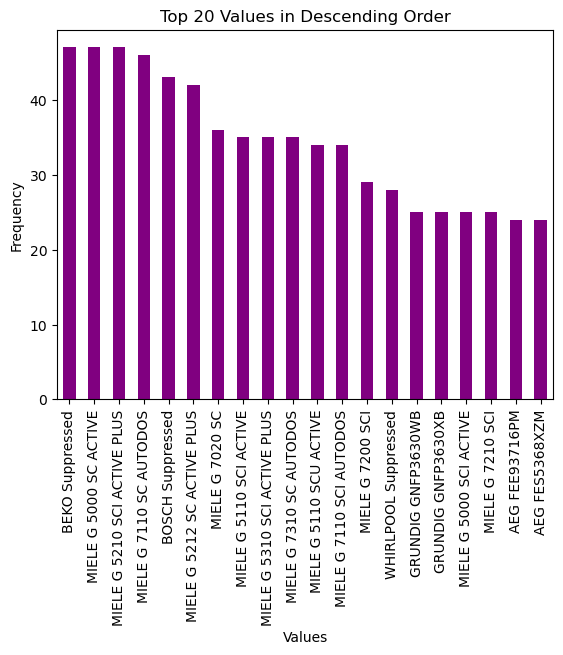

Analyzing discrete column: Period
Frequency Distribution:
 Period
2023-01-01    1010
2023-02-01     909
2023-03-01     975
2023-04-01     919
2023-05-01     972
2023-06-01     999
2023-07-01    1032
2023-08-01     947
2023-09-01     976
2023-10-01    1093
2023-11-01    1089
2023-12-01    1179
2024-01-01    1169
2024-02-01    1092
2024-03-01    1094
2024-04-01    1116
2024-05-01    1102
2024-06-01    1074
2024-07-01    1165
2024-08-01    1036
2024-09-01    1051
2024-10-01    1095
2024-11-01    1026
2024-12-01    1111
2025-01-01      15
Name: count, dtype: int64
Mode: 2023-12-01 00:00:00
Proportions:
 Period
2023-01-01    0.040006
2023-02-01    0.036006
2023-03-01    0.038620
2023-04-01    0.036402
2023-05-01    0.038501
2023-06-01    0.039571
2023-07-01    0.040878
2023-08-01    0.037511
2023-09-01    0.038660
2023-10-01    0.043294
2023-11-01    0.043136
2023-12-01    0.046700
2024-01-01    0.046304
2024-02-01    0.043254
2024-03-01    0.043334
2024-04-01    0.044205
2024-05-01    0.04

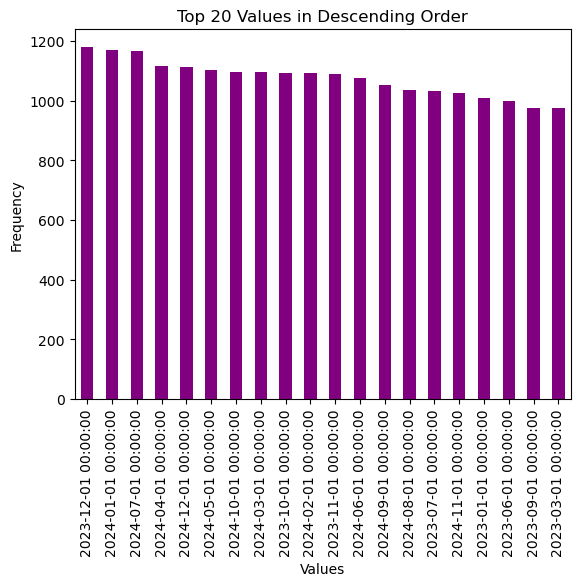

Analyzing discrete column: Noise Level Class
Frequency Distribution:
 Noise Level Class
-         157
A         133
B       14231
C        9570
D         132
n.a.     1023
Name: count, dtype: int64
Mode: B
Proportions:
 Noise Level Class
-       0.006219
A       0.005268
B       0.563693
C       0.379070
D       0.005229
n.a.    0.040521
Name: count, dtype: float64


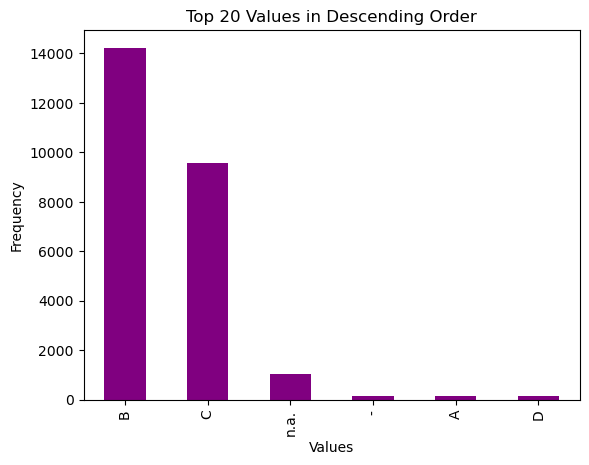

Analyzing discrete column: RUN Time
Frequency Distribution:
 RUN Time
-      2085
142      24
165     144
175       8
184       6
185       4
190    1951
191      11
193      42
195     293
198     163
199     586
200     835
201       8
203      13
204      10
205     429
210    1505
212      30
215    1199
220    1057
221      95
223      59
224     138
225    1789
227     232
228     135
229      64
230    1078
232     119
233      71
234     295
235    1161
236     198
237     486
238     380
239     339
240    3067
245     234
250     300
252      45
254       4
255      13
256      20
259      15
260       6
265     620
270    1262
275     800
280     167
285      13
290       3
295    1405
297      10
298     105
299      20
320      55
324      16
385      24
Name: count, dtype: int64
Mode: 240
Proportions:
 RUN Time
-      0.082587
142    0.000951
165    0.005704
175    0.000317
184    0.000238
185    0.000158
190    0.077280
191    0.000436
193    0.001664
195    0.011606
198

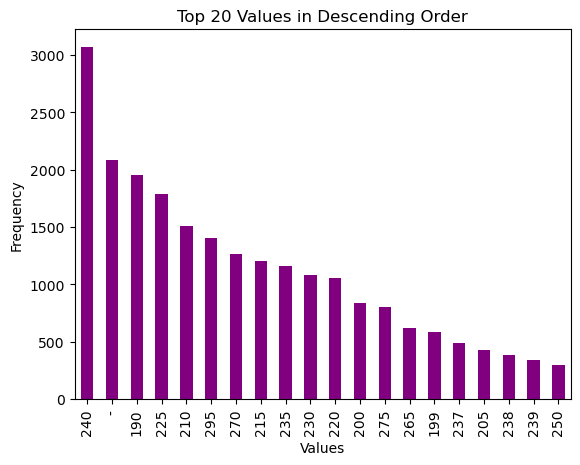

Analyzing discrete column: En.Cons.100cy
Frequency Distribution:
 En.Cons.100cy
-      1781
101      21
102     269
104     462
105     137
262      18
44        3
46        3
47       19
51       47
53       17
54     1220
55      150
56        2
59      264
61      258
62       15
63      201
64     1011
65      653
66      149
67      218
70      344
71        8
72        7
73      336
74     1612
75     1933
76     1057
77      316
78      199
80       20
81      151
82       20
83      122
84     2068
85     2570
86      556
92     1973
93      416
94     1889
95     2410
96       87
97      234
Name: count, dtype: int64
Mode: 85
Proportions:
 En.Cons.100cy
-      0.070546
101    0.000832
102    0.010655
104    0.018300
105    0.005427
262    0.000713
44     0.000119
46     0.000119
47     0.000753
51     0.001862
53     0.000673
54     0.048324
55     0.005942
56     0.000079
59     0.010457
61     0.010219
62     0.000594
63     0.007962
64     0.040046
65     0.025865
66     0.

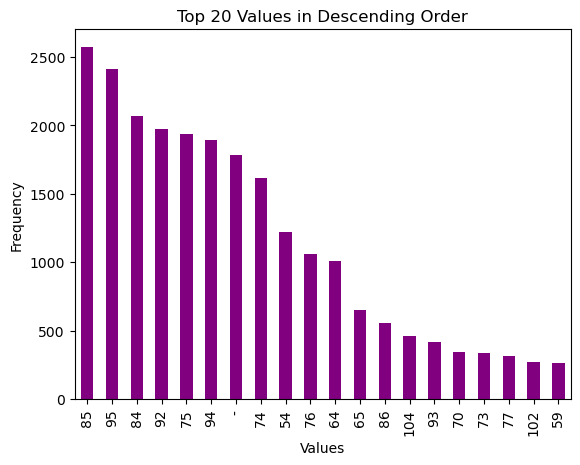

Analyzing discrete column: En.EFF.Class
Frequency Distribution:
 En.EFF.Class
-           157
A          1347
B          2016
C          4763
D          5518
E          8699
F          1541
G            45
UNKNOWN     174
n.a.        986
Name: count, dtype: int64
Mode: E
Proportions:
 En.EFF.Class
-          0.006219
A          0.053355
B          0.079854
C          0.188664
D          0.218569
E          0.344569
F          0.061039
G          0.001782
UNKNOWN    0.006892
n.a.       0.039056
Name: count, dtype: float64


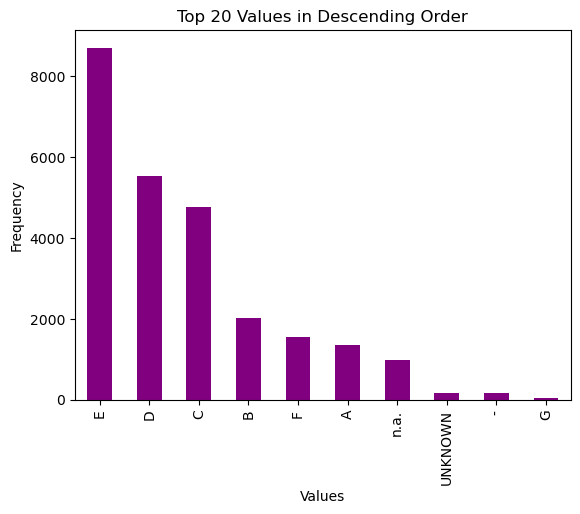

Analyzing discrete column: Color
Frequency Distribution:
 Color
-                   157
Beige                47
Black               790
Gray                122
Red                  12
Silver             6709
Unclassified         63
White              4786
not Applicable    12560
Name: count, dtype: int64
Mode: not Applicable
Proportions:
 Color
-                 0.006219
Beige             0.001862
Black             0.031292
Gray              0.004832
Red               0.000475
Silver            0.265745
Unclassified      0.002495
White             0.189575
not Applicable    0.497505
Name: count, dtype: float64


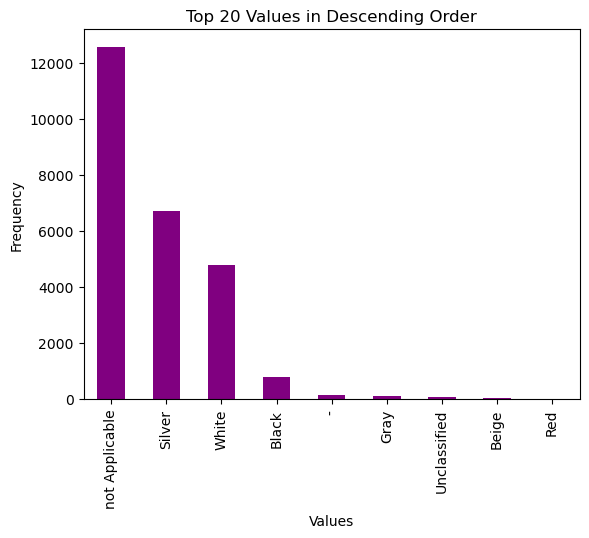

Analyzing discrete column: Comm. Protocols
Frequency Distribution:
 Comm. Protocols
-                   157
BT+WIFI             727
NFC                 146
NFC+WIFI              6
NOT APPLICABLE    15356
WIFI               8748
n.a.                106
Name: count, dtype: int64
Mode: NOT APPLICABLE
Proportions:
 Comm. Protocols
-                 0.006219
BT+WIFI           0.028797
NFC               0.005783
NFC+WIFI          0.000238
NOT APPLICABLE    0.608255
WIFI              0.346510
n.a.              0.004199
Name: count, dtype: float64


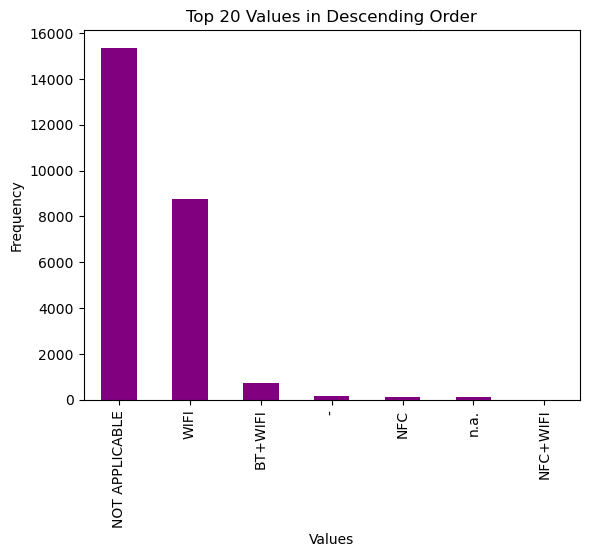

Analyzing discrete column: Constr.2
Frequency Distribution:
 Constr.2
BUILT IN/UNDER    15718
FREESTANDING       9528
Name: count, dtype: int64
Mode: BUILT IN/UNDER
Proportions:
 Constr.2
BUILT IN/UNDER    0.622594
FREESTANDING      0.377406
Name: count, dtype: float64


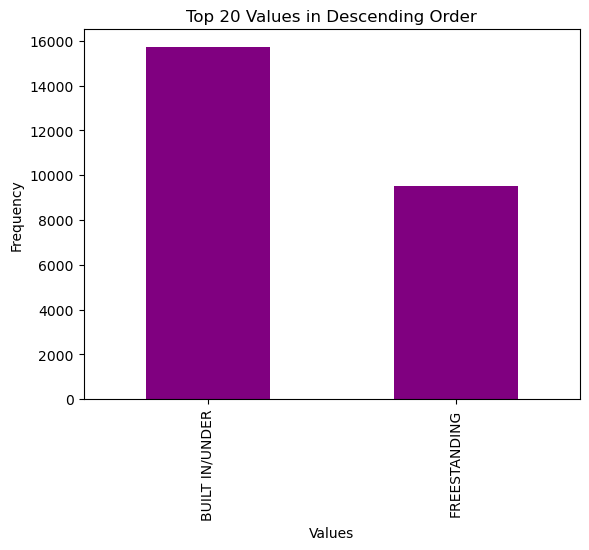

Analyzing discrete column: Cutler Rack
Frequency Distribution:
 Cutler Rack
-                    157
FULL SIZE RACK     12065
HALF SIZED RACK       58
NO                 12754
UNKNOWN               67
n.a.                 145
Name: count, dtype: int64
Mode: NO
Proportions:
 Cutler Rack
-                  0.006219
FULL SIZE RACK     0.477897
HALF SIZED RACK    0.002297
NO                 0.505189
UNKNOWN            0.002654
n.a.               0.005743
Name: count, dtype: float64


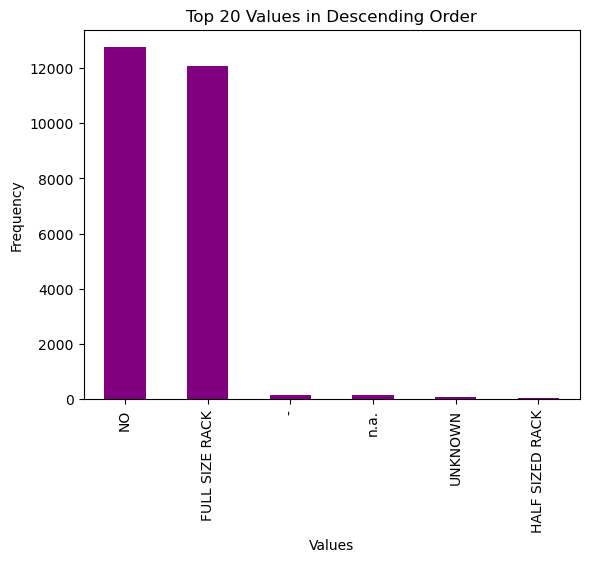

Analyzing discrete column: Display
Frequency Distribution:
 Display
-            157
NO          2905
UNKNOWN       32
YES        22152
Name: count, dtype: int64
Mode: YES
Proportions:
 Display
-          0.006219
NO         0.115068
UNKNOWN    0.001268
YES        0.877446
Name: count, dtype: float64


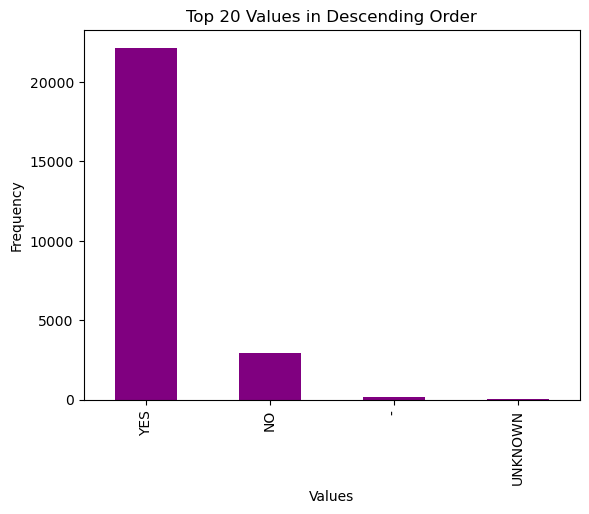

Analyzing discrete column: Half Load
Frequency Distribution:
 Half Load
-            157
NO          9173
UNKNOWN       43
YES        15872
n.a.           1
Name: count, dtype: int64
Mode: YES
Proportions:
 Half Load
-          0.006219
NO         0.363345
UNKNOWN    0.001703
YES        0.628694
n.a.       0.000040
Name: count, dtype: float64


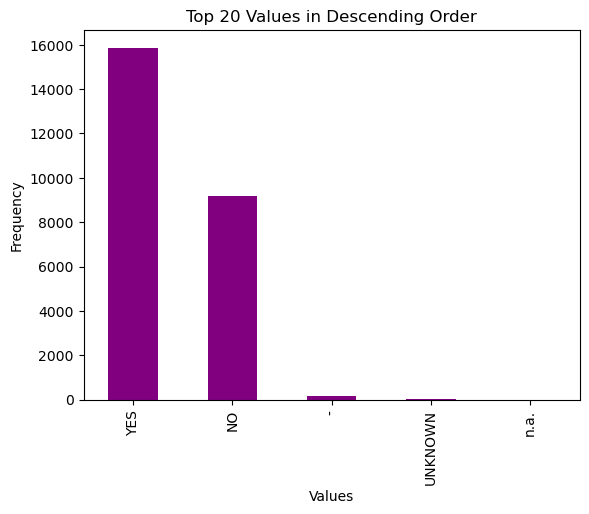

Analyzing discrete column: Integration
Frequency Distribution:
 Integration
FULLY     12610
NO         9886
PARTLY     2750
Name: count, dtype: int64
Mode: FULLY
Proportions:
 Integration
FULLY     0.499485
NO        0.391587
PARTLY    0.108928
Name: count, dtype: float64


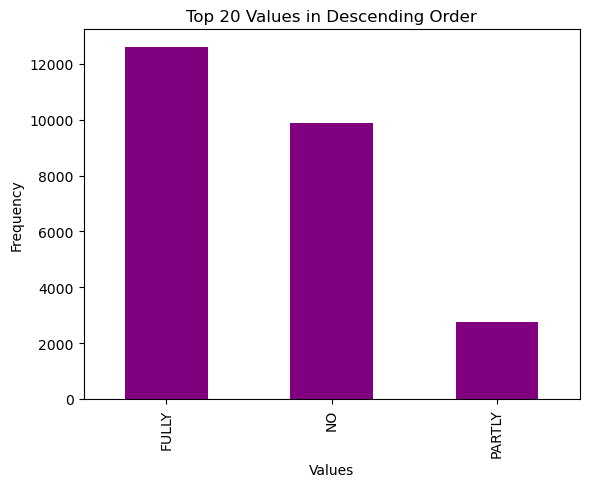

Analyzing discrete column: Inverter Motor
Frequency Distribution:
 Inverter Motor
-            157
NO         10115
UNKNOWN       68
YES        14817
n.a.          89
Name: count, dtype: int64
Mode: YES
Proportions:
 Inverter Motor
-          0.006219
NO         0.400658
UNKNOWN    0.002693
YES        0.586905
n.a.       0.003525
Name: count, dtype: float64


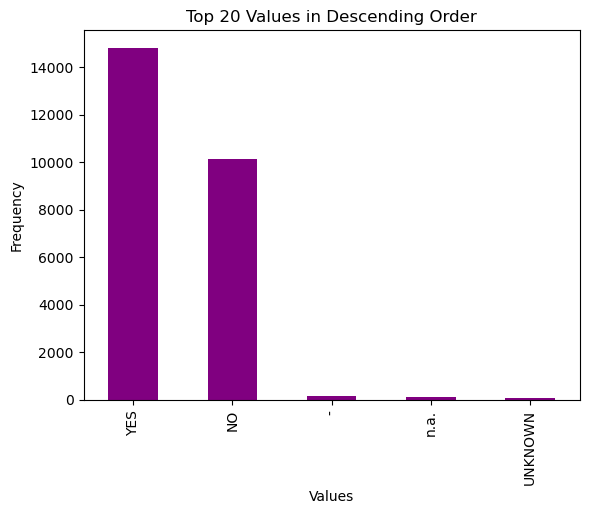

Analyzing discrete column: Material
Frequency Distribution:
 Material
-                    157
GLASS                 15
METAL                645
NOT APPLICABLE     12534
PLASTIC              299
STAINLESS STEEL     3302
UNKNOWN             4351
n.a.                3943
Name: count, dtype: int64
Mode: NOT APPLICABLE
Proportions:
 Material
-                  0.006219
GLASS              0.000594
METAL              0.025549
NOT APPLICABLE     0.496475
PLASTIC            0.011843
STAINLESS STEEL    0.130793
UNKNOWN            0.172344
n.a.               0.156183
Name: count, dtype: float64


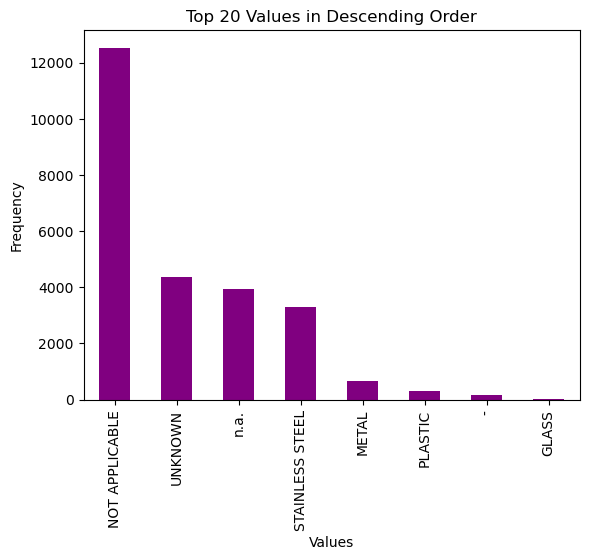

Analyzing discrete column: Material/2
Frequency Distribution:
 Material/2
-                    157
Glass                 15
Metal                645
Plastic              299
Stainless Steel     5198
Unclassified        6674
not Applicable     12258
Name: count, dtype: int64
Mode: not Applicable
Proportions:
 Material/2
-                  0.006219
Glass              0.000594
Metal              0.025549
Plastic            0.011843
Stainless Steel    0.205894
Unclassified       0.264359
not Applicable     0.485542
Name: count, dtype: float64


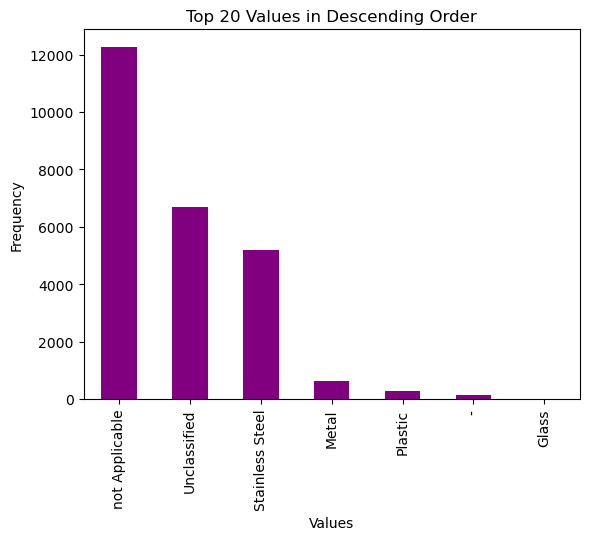

Analyzing discrete column: NO OF Placesets
Frequency Distribution:
 NO OF Placesets
-         3
10     1591
11      196
12     2538
13     6469
14    11218
15     1541
16      578
17       20
6       339
7        37
9       716
Name: count, dtype: int64
Mode: 14
Proportions:
 NO OF Placesets
-     0.000119
10    0.063020
11    0.007764
12    0.100531
13    0.256239
14    0.444348
15    0.061039
16    0.022895
17    0.000792
6     0.013428
7     0.001466
9     0.028361
Name: count, dtype: float64


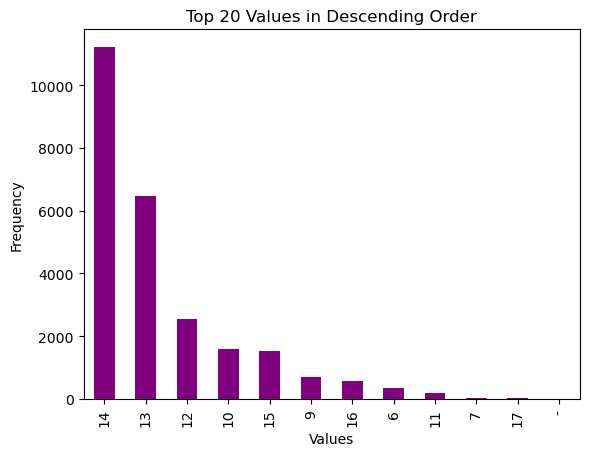

Analyzing discrete column: NO. OF Progr.
Frequency Distribution:
 NO. OF Progr.
-      367
10     780
11     172
12     182
13      68
2       40
3        5
4      836
5     6904
6     7409
7     3737
8     3316
9     1430
Name: count, dtype: int64
Mode: 6
Proportions:
 NO. OF Progr.
-     0.014537
10    0.030896
11    0.006813
12    0.007209
13    0.002693
2     0.001584
3     0.000198
4     0.033114
5     0.273469
6     0.293472
7     0.148023
8     0.131348
9     0.056643
Name: count, dtype: float64


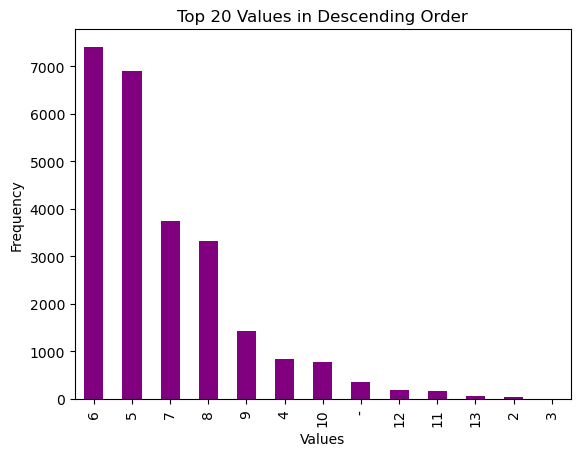

Analyzing discrete column: Noise Level DB
Frequency Distribution:
 Noise Level DB
-       18
0       19
38     135
39     326
40     805
41     955
42    3798
43    2181
44    6668
45    1680
46    4666
47    1467
48    1451
49     912
50       8
51      96
52      18
53      31
54      12
Name: count, dtype: int64
Mode: 44
Proportions:
 Noise Level DB
-     0.000713
0     0.000753
38    0.005347
39    0.012913
40    0.031886
41    0.037828
42    0.150440
43    0.086390
44    0.264121
45    0.066545
46    0.184821
47    0.058108
48    0.057474
49    0.036125
50    0.000317
51    0.003803
52    0.000713
53    0.001228
54    0.000475
Name: count, dtype: float64


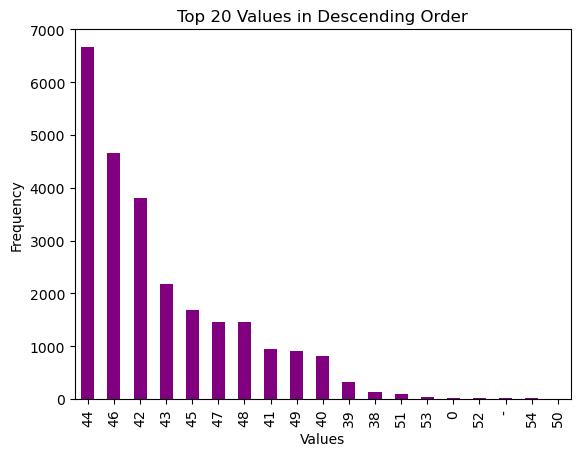

Analyzing discrete column: Program Autom.
Frequency Distribution:
 Program Autom.
NO          4430
UNKNOWN        3
YES        20813
Name: count, dtype: int64
Mode: YES
Proportions:
 Program Autom.
NO         0.175473
UNKNOWN    0.000119
YES        0.824408
Name: count, dtype: float64


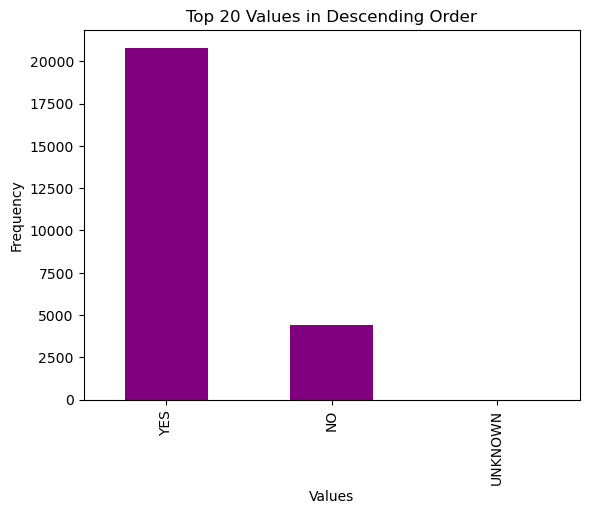

Analyzing discrete column: Remaining Time
Frequency Distribution:
 Remaining Time
-            157
NO          4461
UNKNOWN       26
YES        20602
Name: count, dtype: int64
Mode: YES
Proportions:
 Remaining Time
-          0.006219
NO         0.176701
UNKNOWN    0.001030
YES        0.816050
Name: count, dtype: float64


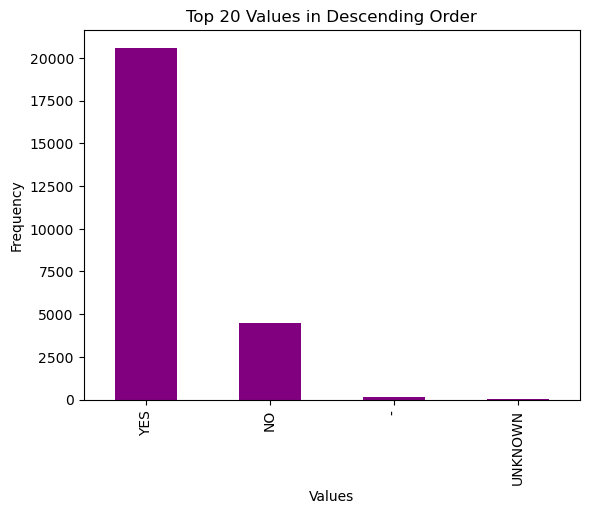

Analyzing discrete column: Size
Frequency Distribution:
 Size
-              157
COMPACT         67
FULLSIZE     22056
SLIMLINE      2479
TABLE TOP      309
n.a.           178
Name: count, dtype: int64
Mode: FULLSIZE
Proportions:
 Size
-            0.006219
COMPACT      0.002654
FULLSIZE     0.873643
SLIMLINE     0.098194
TABLE TOP    0.012240
n.a.         0.007051
Name: count, dtype: float64


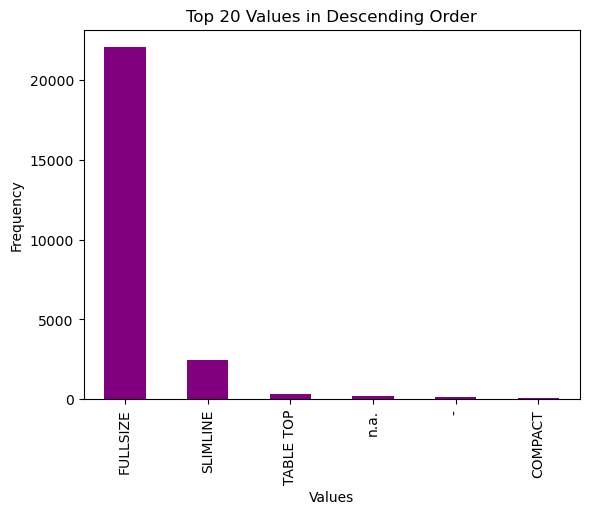

Analyzing discrete column: Sliding Hinges
Frequency Distribution:
 Sliding Hinges
-                   157
NO                11441
NOT APPLICABLE     9578
UNKNOWN               5
YES                4030
n.a.                 35
Name: count, dtype: int64
Mode: NO
Proportions:
 Sliding Hinges
-                 0.006219
NO                0.453181
NOT APPLICABLE    0.379387
UNKNOWN           0.000198
YES               0.159629
n.a.              0.001386
Name: count, dtype: float64


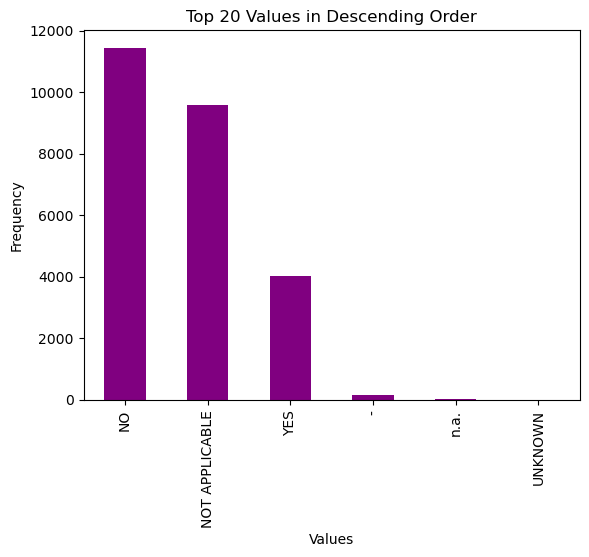

Analyzing discrete column: Smart Connect
Frequency Distribution:
 Smart Connect
-                    157
NO                 15334
SMART APP CTRL.     1779
SMART CHECK/DIA       48
VOICE CONTROL       7824
n.a.                 104
Name: count, dtype: int64
Mode: NO
Proportions:
 Smart Connect
-                  0.006219
NO                 0.607383
SMART APP CTRL.    0.070467
SMART CHECK/DIA    0.001901
VOICE CONTROL      0.309910
n.a.               0.004119
Name: count, dtype: float64


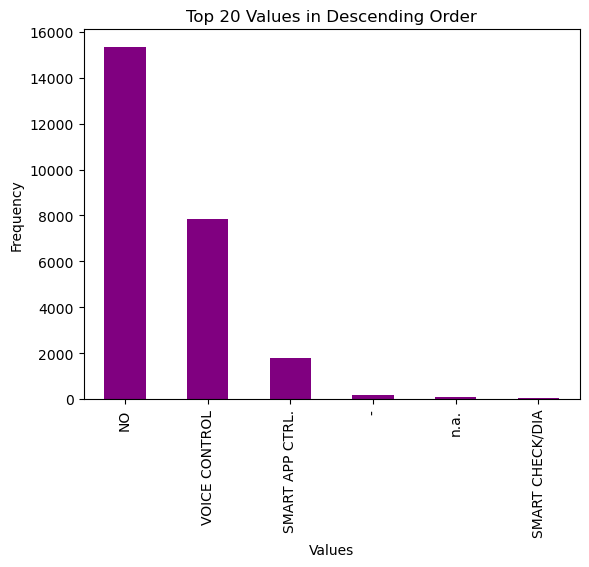

Analyzing discrete column: Speed  Function
Frequency Distribution:
 Speed  Function
-            157
NO         10946
UNKNOWN       63
YES        13991
n.a.          89
Name: count, dtype: int64
Mode: YES
Proportions:
 Speed  Function
-          0.006219
NO         0.433574
UNKNOWN    0.002495
YES        0.554187
n.a.       0.003525
Name: count, dtype: float64


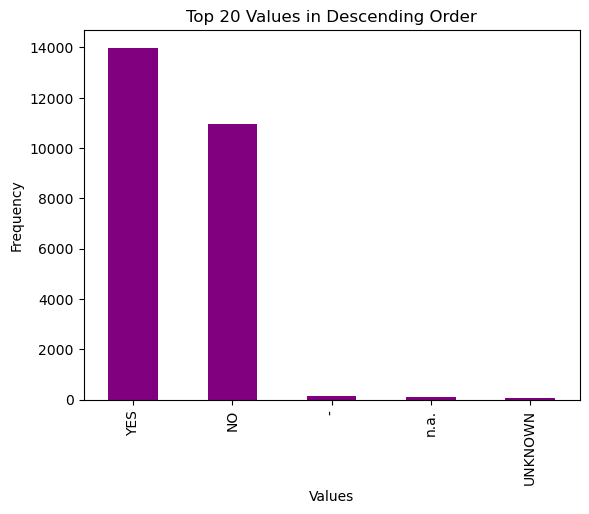

Analyzing discrete column: Start Delay
Frequency Distribution:
 Start Delay
-            157
NO           509
UNKNOWN       23
YES        24557
Name: count, dtype: int64
Mode: YES
Proportions:
 Start Delay
-          0.006219
NO         0.020162
UNKNOWN    0.000911
YES        0.972709
Name: count, dtype: float64


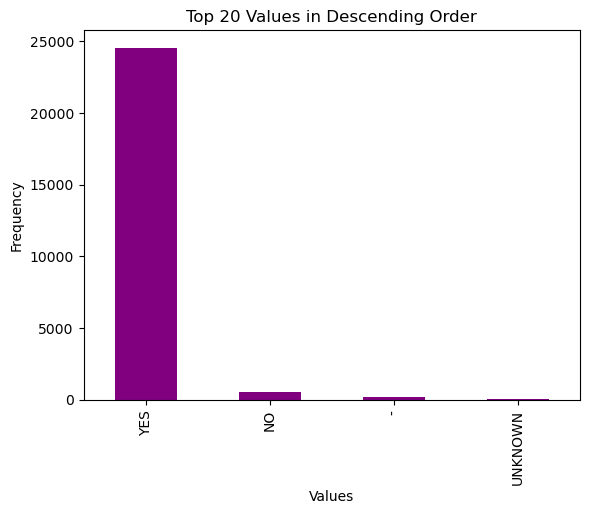

Analyzing discrete column: Water Consumpt.
Frequency Distribution:
 Water Consumpt.
-        363
10       487
10.2       2
10.4     150
10.5    1629
10.8      89
10.9     370
11      1319
11.4     425
11.5     385
11.7     114
11.8       2
11.9     151
12       554
12.4       1
12.9     200
13        17
13.5       1
13.9       2
14         4
15         3
16        16
6          7
6.5      206
6.7      138
6.9       40
7          3
7.5       49
7.6       11
7.7       63
7.9       55
8        323
8.1       60
8.4     1237
8.5      834
8.7      162
8.9     1047
9       2696
9.2      124
9.4      181
9.5     9398
9.6      148
9.7       79
9.8      168
9.9     1933
Name: count, dtype: int64
Mode: 9.5
Proportions:
 Water Consumpt.
-       0.014379
10      0.019290
10.2    0.000079
10.4    0.005942
10.5    0.064525
10.8    0.003525
10.9    0.014656
11      0.052246
11.4    0.016834
11.5    0.015250
11.7    0.004516
11.8    0.000079
11.9    0.005981
12      0.021944
12.4    0.000040
12.9    0.

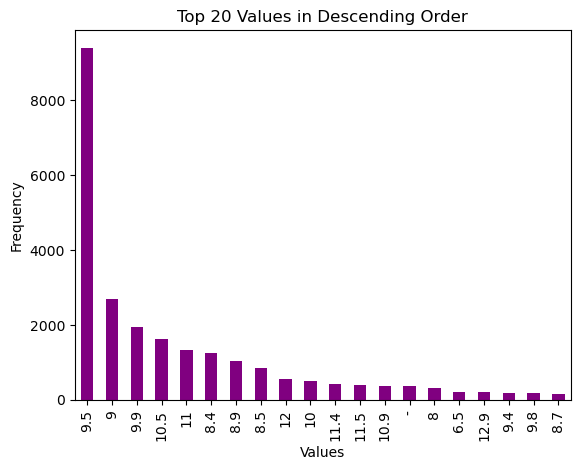

Analyzing discrete column: Water Protect
Frequency Distribution:
 Water Protect
-            157
NO          2895
UNKNOWN       56
YES        22138
Name: count, dtype: int64
Mode: YES
Proportions:
 Water Protect
-          0.006219
NO         0.114672
UNKNOWN    0.002218
YES        0.876891
Name: count, dtype: float64


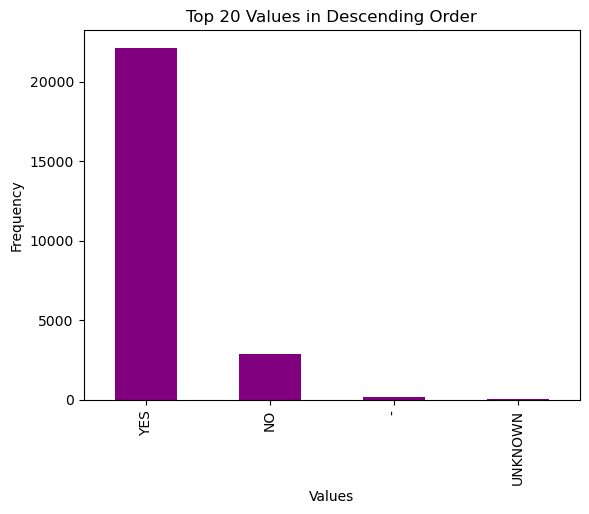

Analyzing continuous column: Revenue
Summary Statistics for Revenue:
 count    2.524600e+04
mean     4.326815e+04
std      8.113869e+04
min     -1.419980e+03
25%      2.545720e+03
50%      1.245776e+04
75%      4.624732e+04
max      1.479028e+06
Name: Revenue, dtype: float64


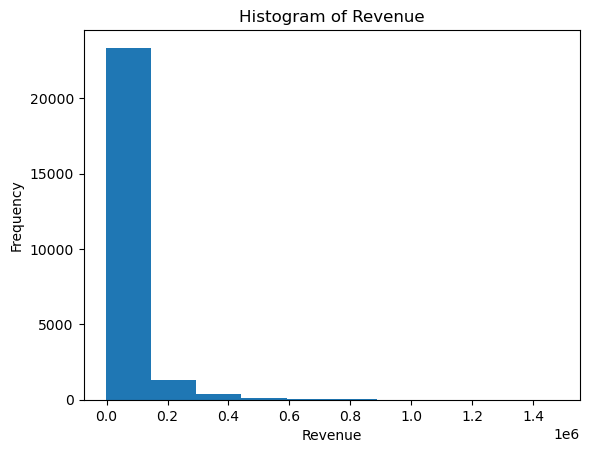

Analyzing discrete column: Revenue Share
Frequency Distribution:
 Revenue Share
0.0000    5898
0.0001    3822
0.0002    2246
0.0003    1616
0.0004    1228
          ... 
0.5943       1
0.6012       1
0.6045       1
0.6316       1
0.7479       1
Name: count, Length: 274, dtype: int64
Mode: 0.0
Proportions:
 Revenue Share
0.0000    0.233621
0.0001    0.151390
0.0002    0.088965
0.0003    0.064010
0.0004    0.048641
            ...   
0.5943    0.000040
0.6012    0.000040
0.6045    0.000040
0.6316    0.000040
0.7479    0.000040
Name: count, Length: 274, dtype: float64


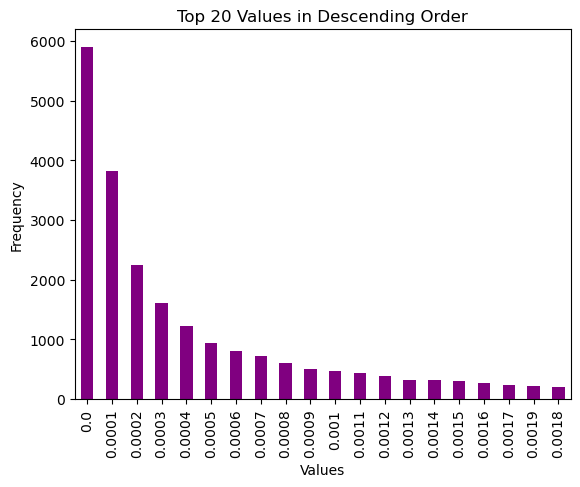

Analyzing continuous column: Units
Summary Statistics for Units:
 count    25246.000000
mean        74.097086
std        150.348479
min         -3.000000
25%          4.000000
50%         18.640500
75%         72.456750
max       3528.000000
Name: Units, dtype: float64


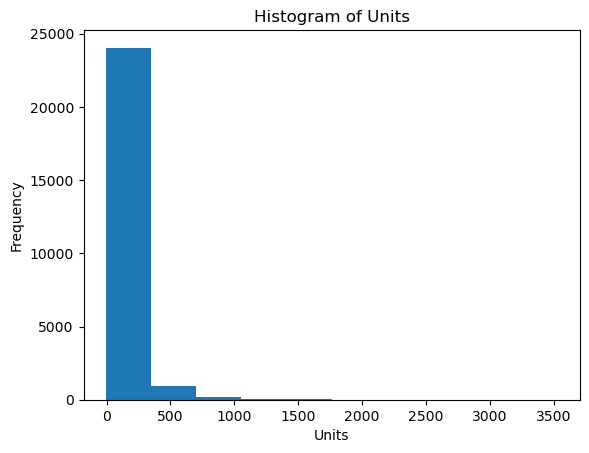

Analyzing discrete column: Units Share
Frequency Distribution:
 Units Share
0.0000    6440
0.0001    4030
0.0002    2148
0.0003    1503
0.0004    1195
          ... 
0.5677       1
0.5784       1
0.5788       1
0.6251       1
0.7074       1
Name: count, Length: 295, dtype: int64
Mode: 0.0
Proportions:
 Units Share
0.0000    0.255090
0.0001    0.159629
0.0002    0.085083
0.0003    0.059534
0.0004    0.047334
            ...   
0.5677    0.000040
0.5784    0.000040
0.5788    0.000040
0.6251    0.000040
0.7074    0.000040
Name: count, Length: 295, dtype: float64


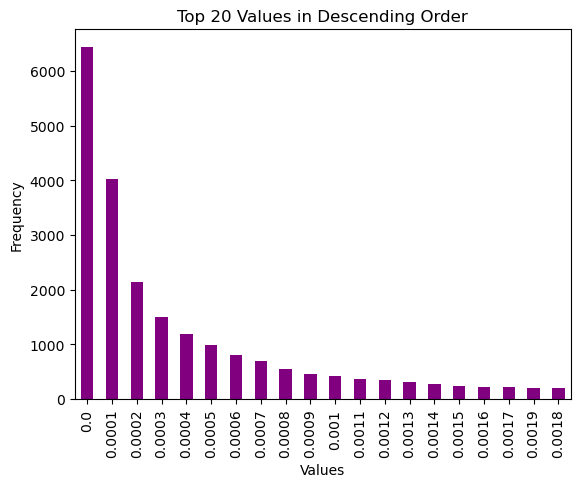

Analyzing discrete column: Price Index


TypeError: '<' not supported between instances of 'str' and 'int'

In [67]:
def is_discrete(series):
    unique_ratio = len(series.unique()) / len(series)
    return unique_ratio < 0.05 or series.dtype == 'object'
 
for column in df.columns:
    if is_discrete(df[column]):
        print(f"Analyzing discrete column: {column}")
        freq_distribution = df[column].value_counts().sort_index()
        print("Frequency Distribution:\n", freq_distribution)
         
        # 2. Mode
        mode_value = df[column].mode()[0]
        print("Mode:", mode_value)
         
        # 3. Proportions/Percentages
        proportions = freq_distribution / freq_distribution.sum()
        print("Proportions:\n", proportions)
         
        # 4. Bar Chart - Plotting Top 20 in Descending Order
        top_20_freq_distribution = freq_distribution.nlargest(20)
        top_20_freq_distribution.plot(kind='bar', color="purple")
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title('Top 20 Values in Descending Order')
        plt.show()

    else:
        print(f"Analyzing continuous column: {column}")
        # Summary statistics
        summary_stats = df[column].describe()
        print(f"Summary Statistics for {column}:\n", summary_stats)
        # Plot histogram
        df[column].plot(kind='hist', bins=10, title=f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [47]:
nan_counts = df.isna().sum()
na_counts = df.apply(lambda x: x.str.lower().eq("n.a.").sum() if x.dtype == "object" else 0)
total_na_counts = nan_counts + na_counts
total_na_counts

Model Name                    0
Period                        0
Noise Level Class          1023
RUN Time                      0
En.Cons.100cy                 0
En.EFF.Class                986
Auto Door Open            14036
Color                         0
Comm. Protocols             106
Constr.2                      0
Cutler Rack                 145
Display                       0
Energy Label EU           10878
Half Load                     1
Integration                   0
Inverter Motor               89
Material                   3943
Material/2                    0
NO OF Placesets               0
NO. OF Progr.                 0
Noise Level DB                0
Program Autom.                0
Remaining Time                0
Size                        178
Sliding Hinges               35
Smart Connect               104
Speed  Function              89
Start Delay                   0
Water Consumpt.               0
Water Protect                 0
Revenue                       0
Revenue 

In [48]:
df["Price"]=df["Average Price"]

**Data Preprocessing**

In [49]:
df=df.drop(columns=["Average Price","Auto Door Open", "Energy Label EU"], errors="ignore")
yeni = df[(df["Units"]>50)]
len(yeni)

7974

In [50]:
unique_models_per_brand = yeni.groupby("Brand")["Model Name"].nunique().sort_values(ascending=False)
unique_models_per_brand

Brand
BOSCH              193
BEKO               143
SIEMENS            130
WHIRLPOOL          108
ELECTROLUX          69
MIELE               62
CANDY               45
AEG                 29
INDESIT             28
HOTPOINT-ARISTO     26
HISENSE             19
SMEG                14
LG                  12
NEFF                11
HAIER                7
WINIA                7
AMICA                6
DE                   6
SAMSUNG              6
ASKO                 6
GRUNDIG              5
BAUKNECHT            1
Name: Model Name, dtype: int64

In [51]:
yeni=yeni.dropna()

**Market Analysis**

                 Total Units Sold  Number of GFK Models        Price
Brand                                                               
WHIRLPOOL              380467.761                   108   565.736857
BOSCH                  322941.676                   193   656.687259
BEKO                   320372.994                   143    432.98214
SIEMENS                117731.470                   130   758.244704
ELECTROLUX             114015.103                    69   635.360448
HOTPOINT-ARISTO        104851.929                    26   466.231085
INDESIT                 81888.658                    28   448.708569
CANDY                   57250.511                    45   427.222927
MIELE                   44810.456                    62  1060.748753
SMEG                    21229.280                    14   682.413659
AEG                     19636.985                    29   757.911599
HISENSE                 18706.129                    19   417.607074
LG                      16908.777 

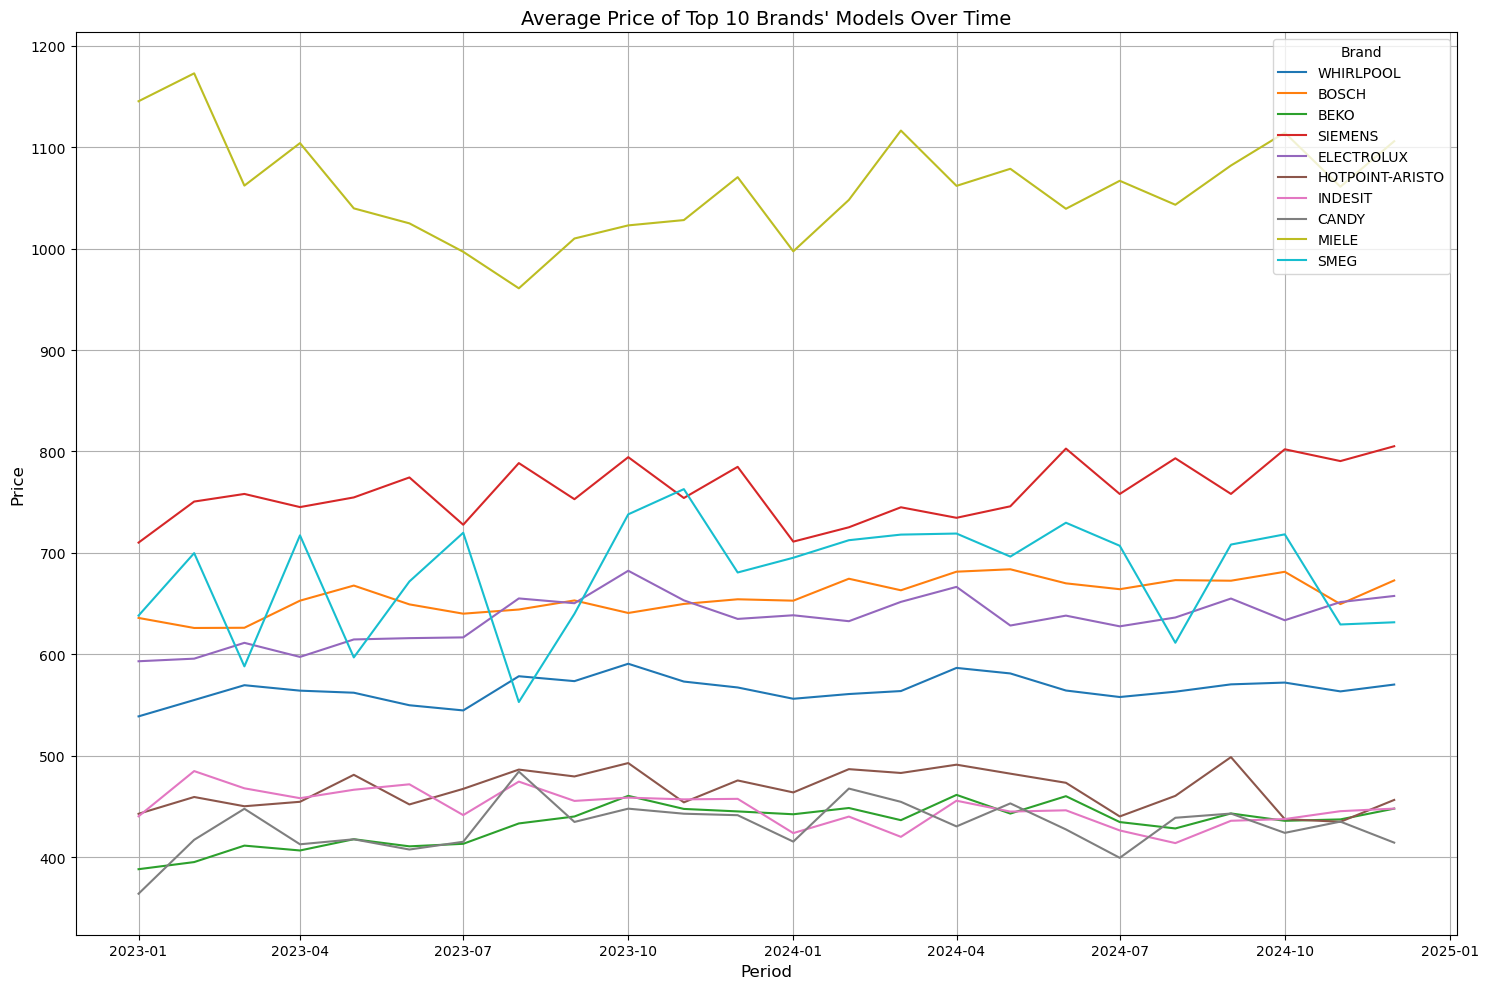

In [52]:
import matplotlib.pyplot as plt

# Sum of units sold per brand
units_of_brands = yeni.groupby("Brand")["Units"].sum().sort_values(ascending=False)

# Count of unique GFK Models per brand
gfk_model_count = yeni.groupby("Brand")["Model Name"].nunique()

# Average price per brand
average_price = yeni.groupby("Brand")["Price"].mean()

# Combine all metrics into a single DataFrame
brand_summary = pd.DataFrame({
    "Total Units Sold": units_of_brands,
    "Number of GFK Models": gfk_model_count,
    "Price": average_price
}).sort_values(by="Total Units Sold", ascending=False)

print(brand_summary)

# top 10 brands
top_10_brands = brand_summary.head(10).index

plt.figure(figsize=(15, 10))
for brand in top_10_brands:
    
    brand_data = yeni[yeni["Brand"] == brand]
    
    avg_price_time = brand_data.groupby("Period")["Price"].mean()
    
    plt.plot(avg_price_time.index, avg_price_time.values, label=brand)

plt.title("Average Price of Top 10 Brands' Models Over Time", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title="Brand", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\909006542.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_data.groupby("Period").apply(
C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\909006542.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_data.groupby("Period").apply(
C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\909006542.py:8: DeprecationWarning: DataFrameGroupBy.apply

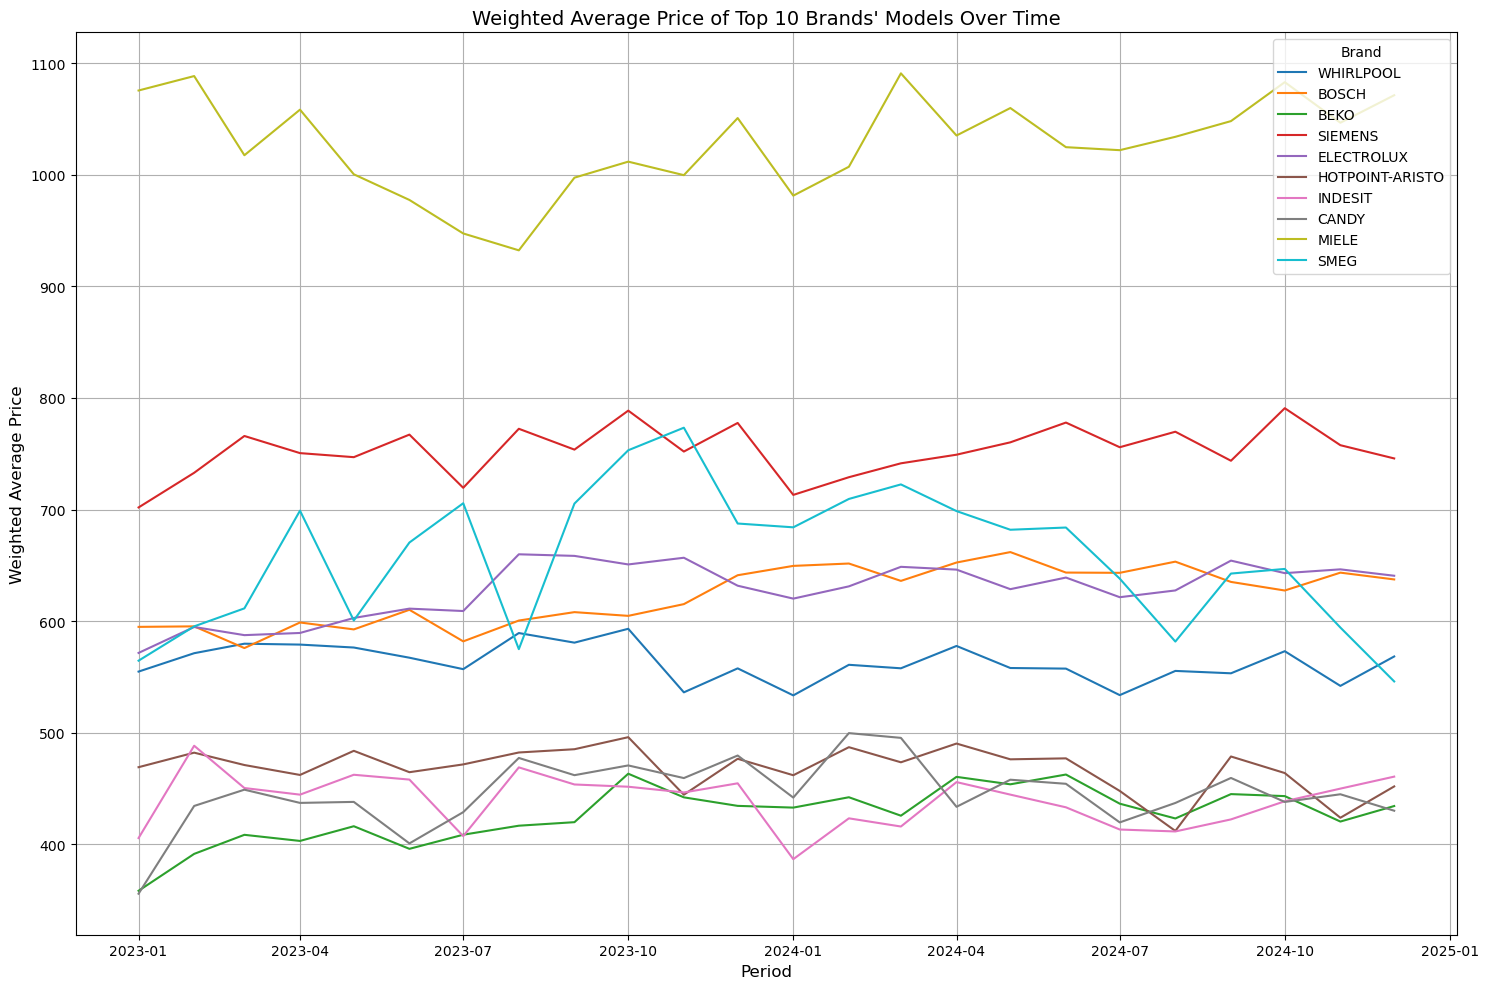

In [53]:
# Time-series analysis: average price of top 10 brands' models over time
plt.figure(figsize=(15, 10))
for brand in top_10_brands:

    brand_data = yeni[yeni["Brand"] == brand]
    
    weighted_avg_price_time = (
        brand_data.groupby("Period").apply(
            lambda group: (group["Price"] * group["Units"]).sum() / group["Units"].sum()
        )
    )
    
    plt.plot(weighted_avg_price_time.index, weighted_avg_price_time.values, label=brand)

plt.title("Weighted Average Price of Top 10 Brands' Models Over Time", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Weighted Average Price", fontsize=12)
plt.legend(title="Brand", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
yeni['Original_Index'] = yeni.index
yeni_copy=yeni.copy()

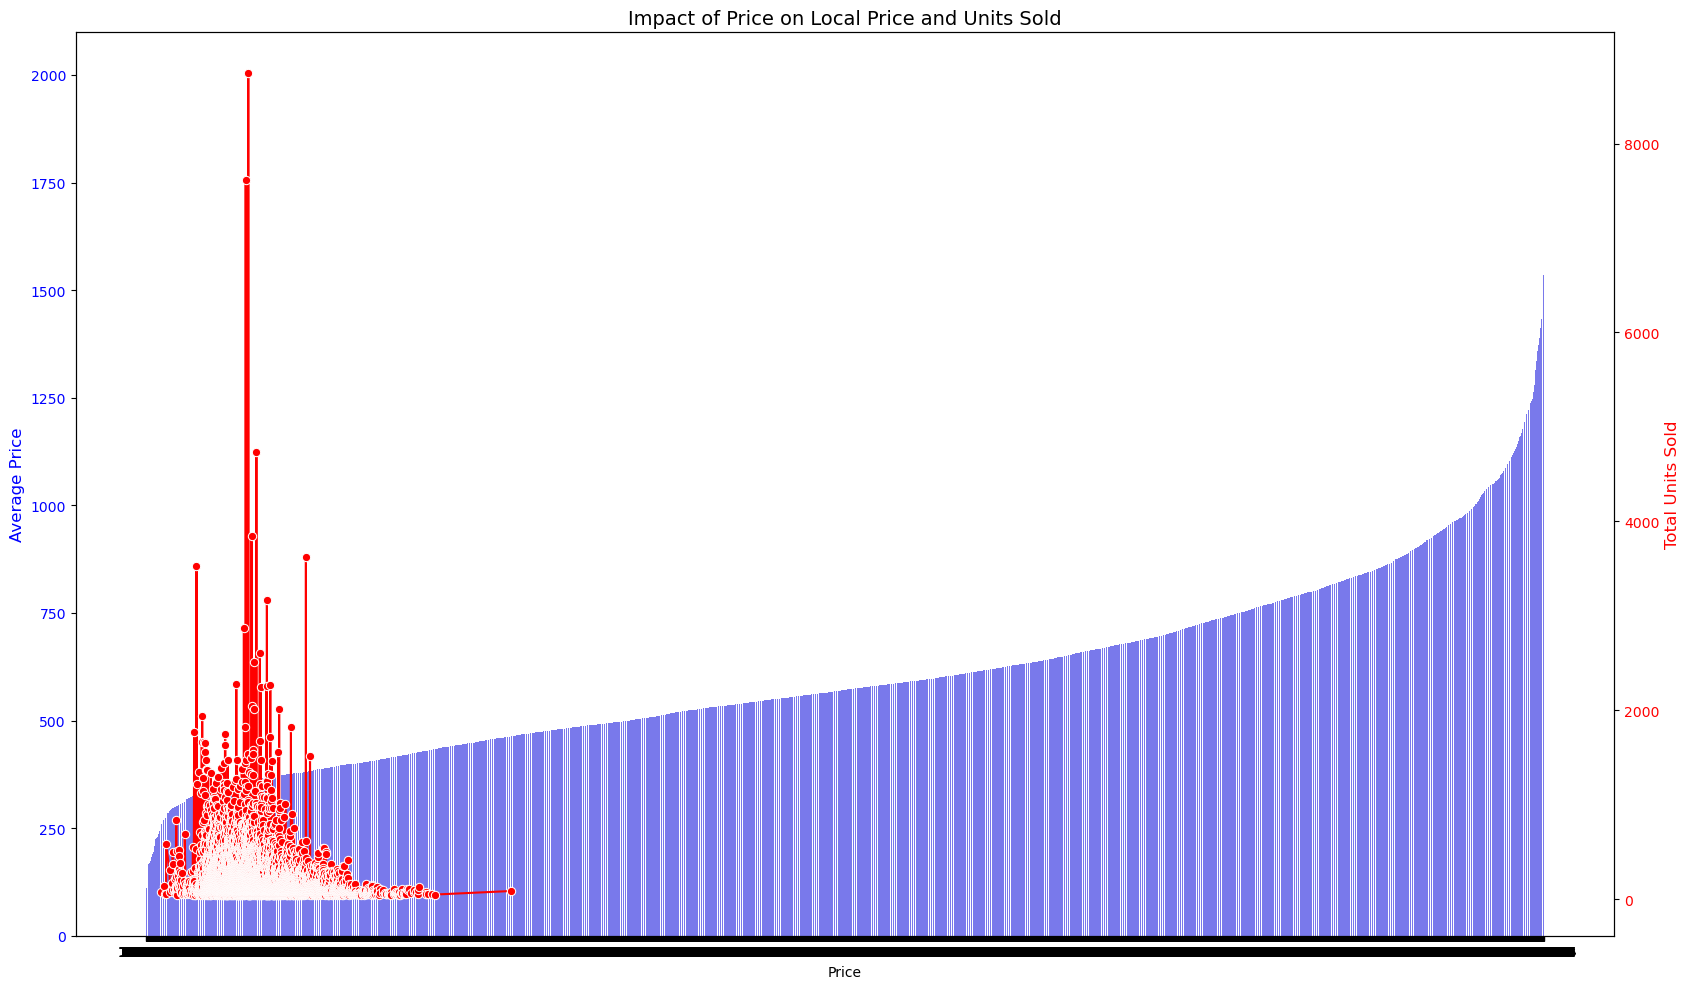

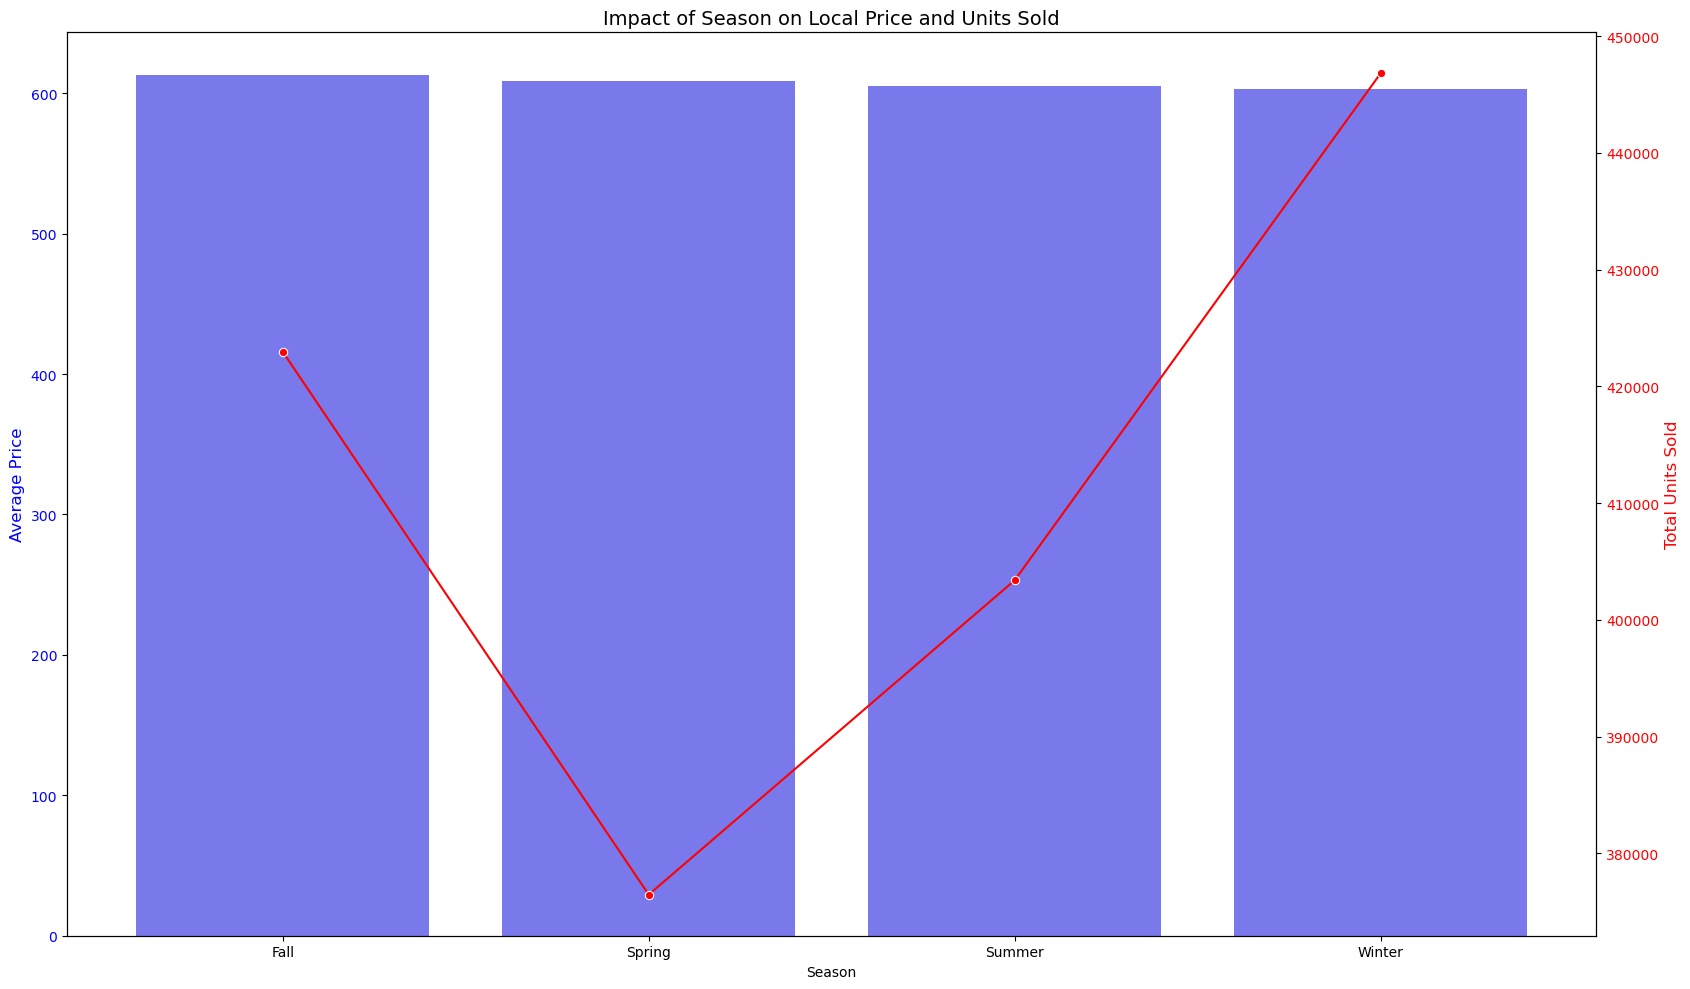

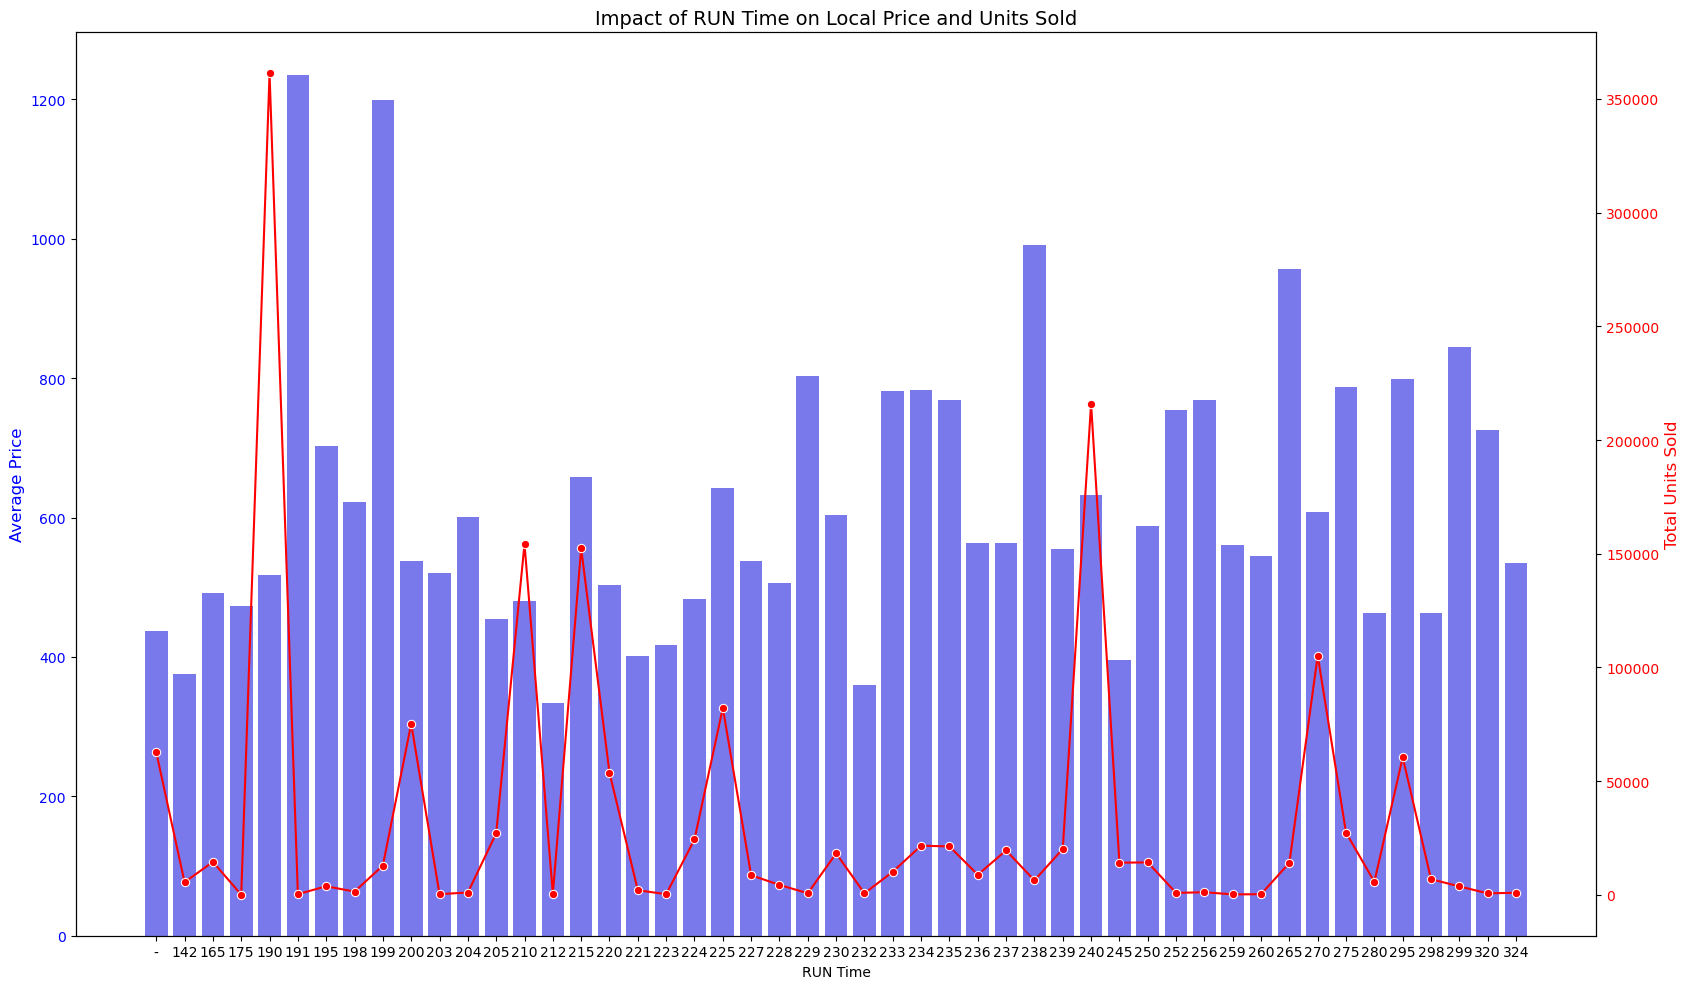

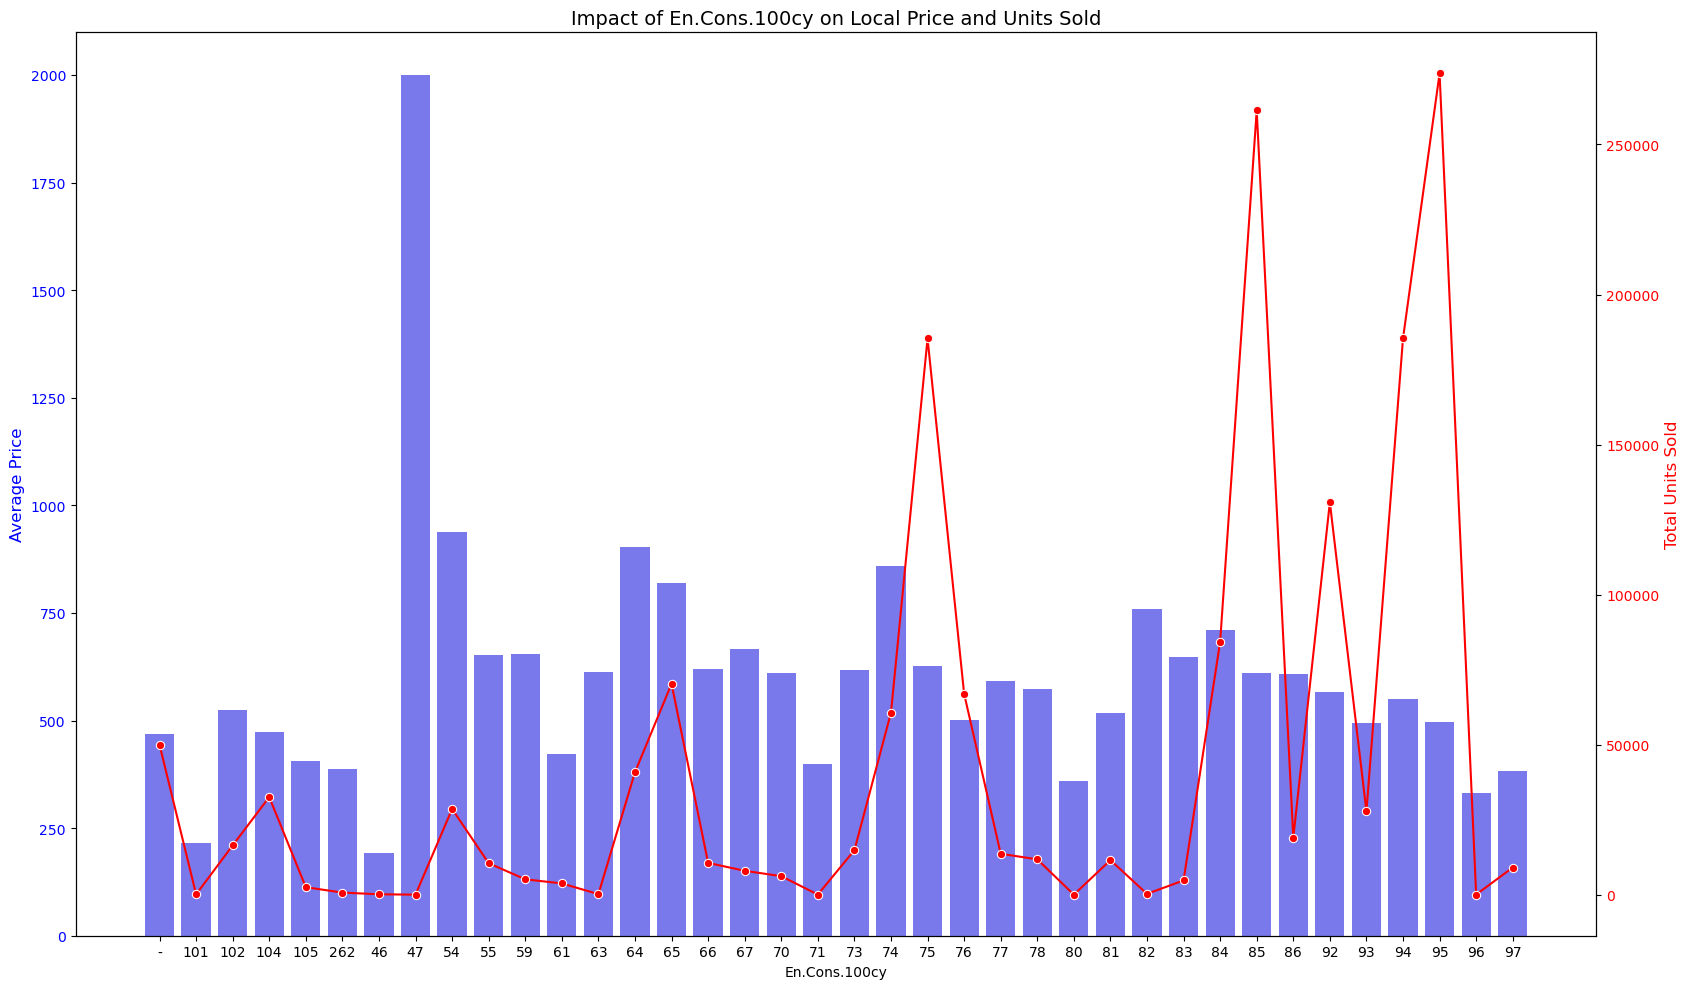

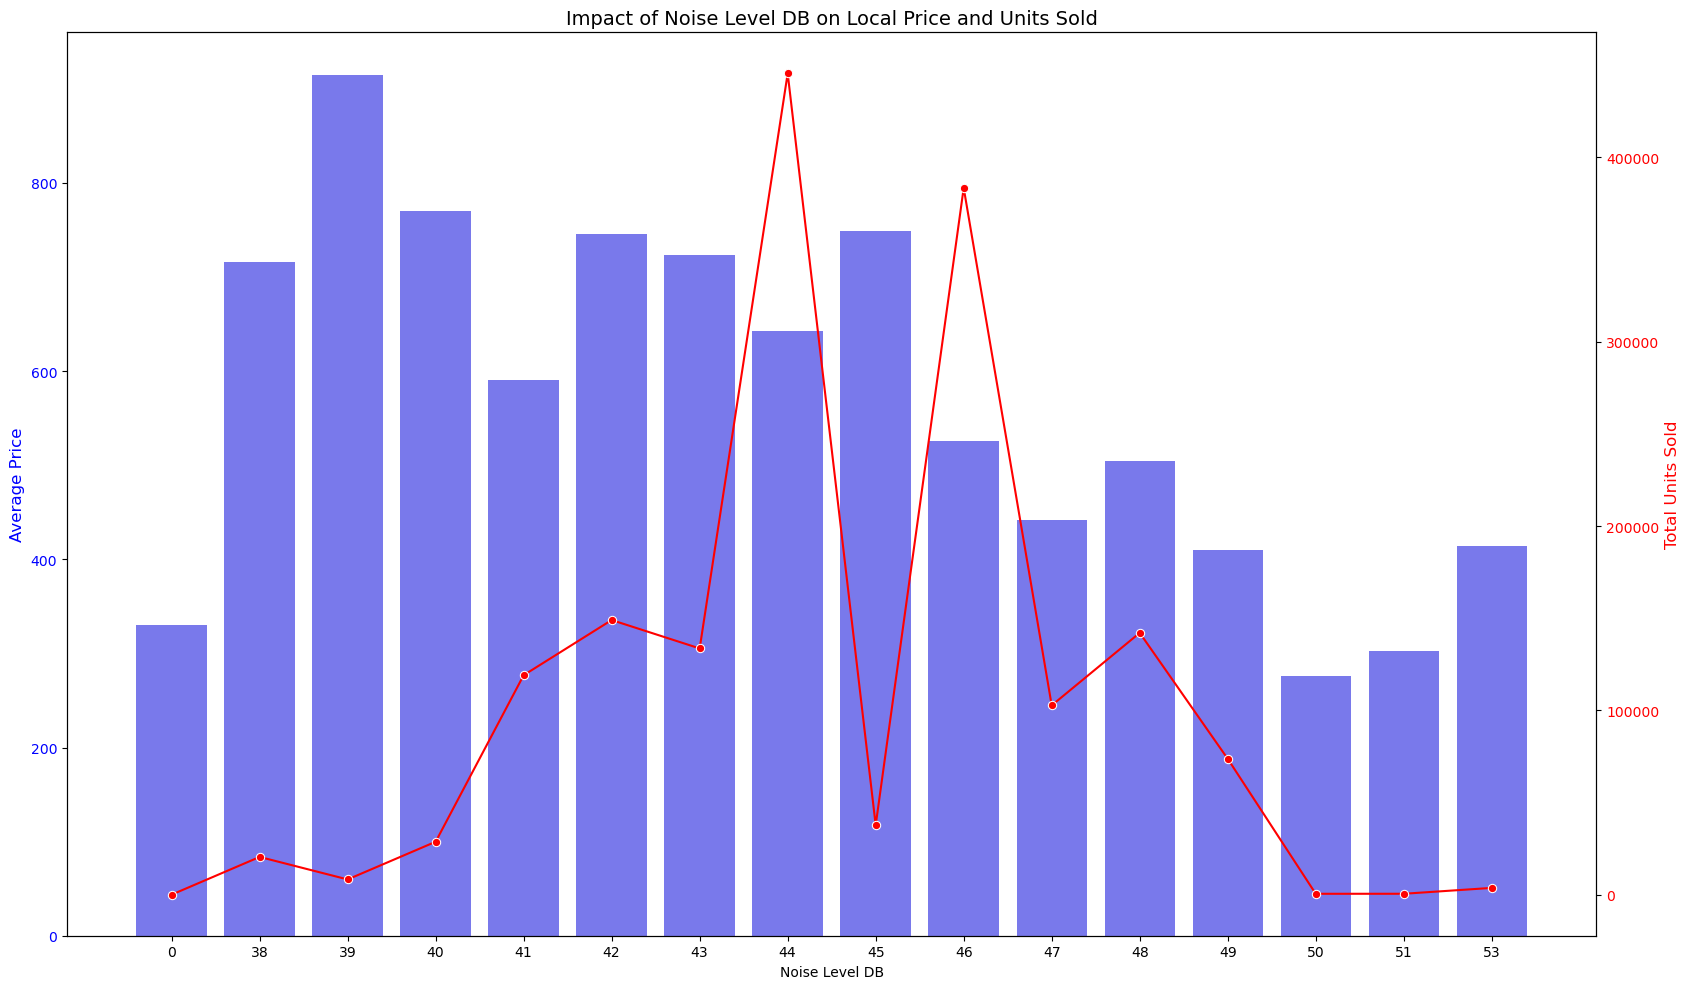

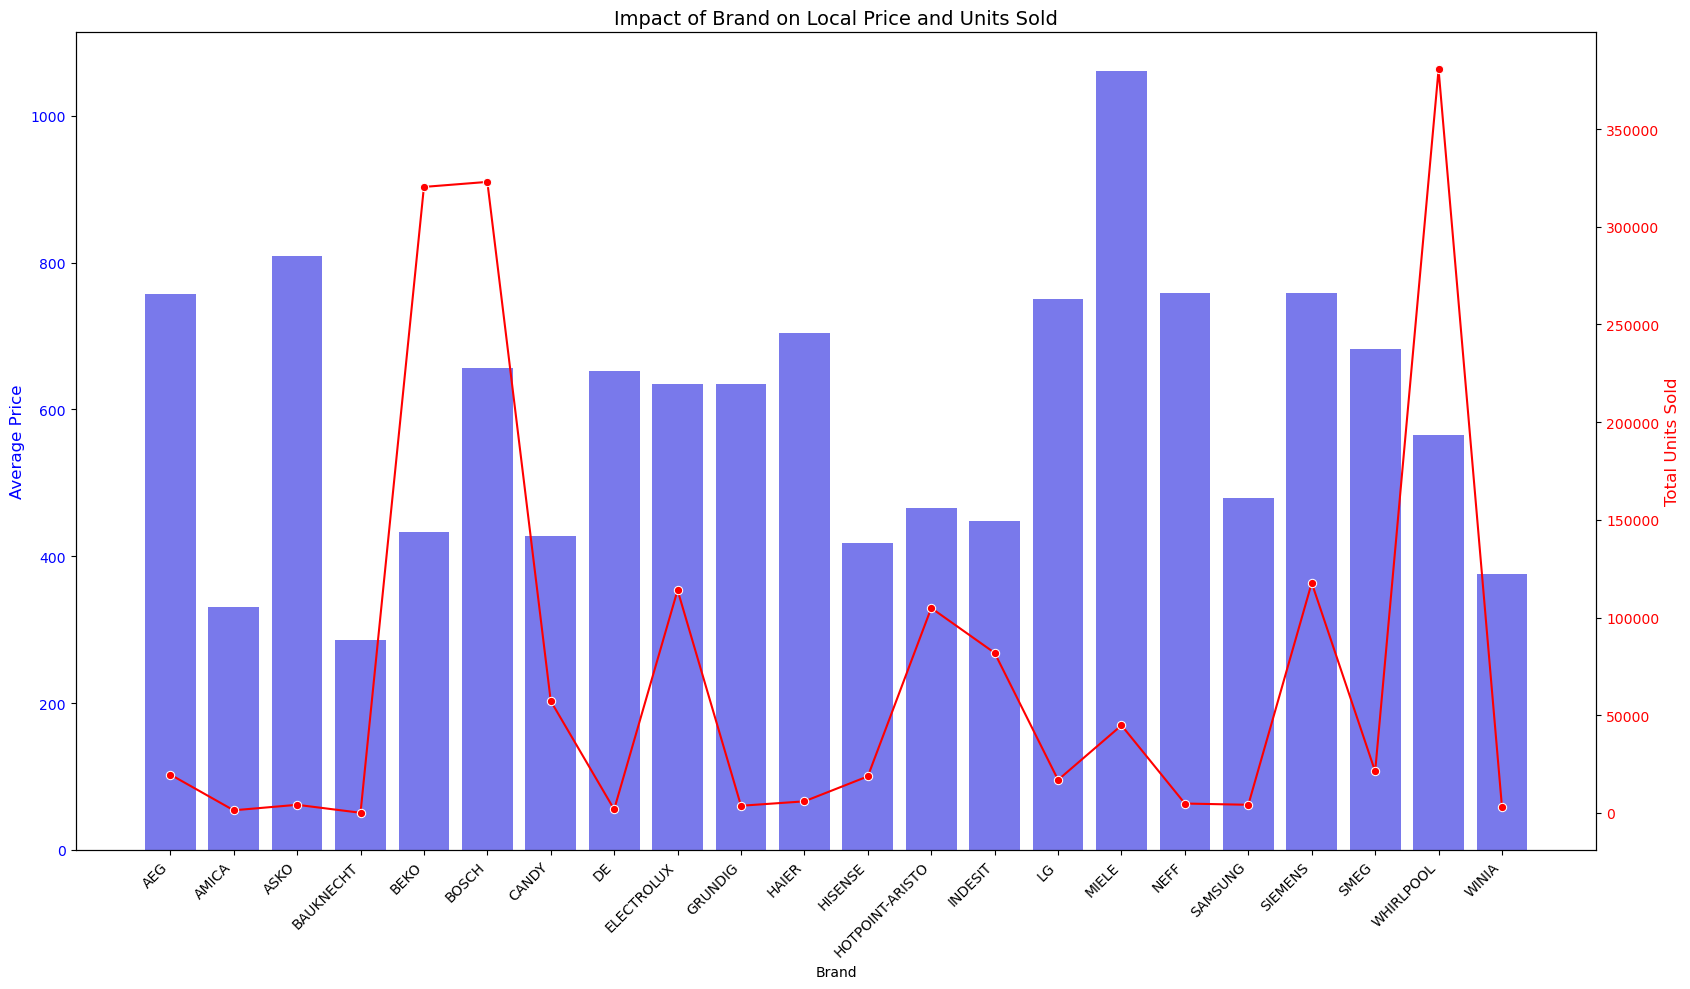

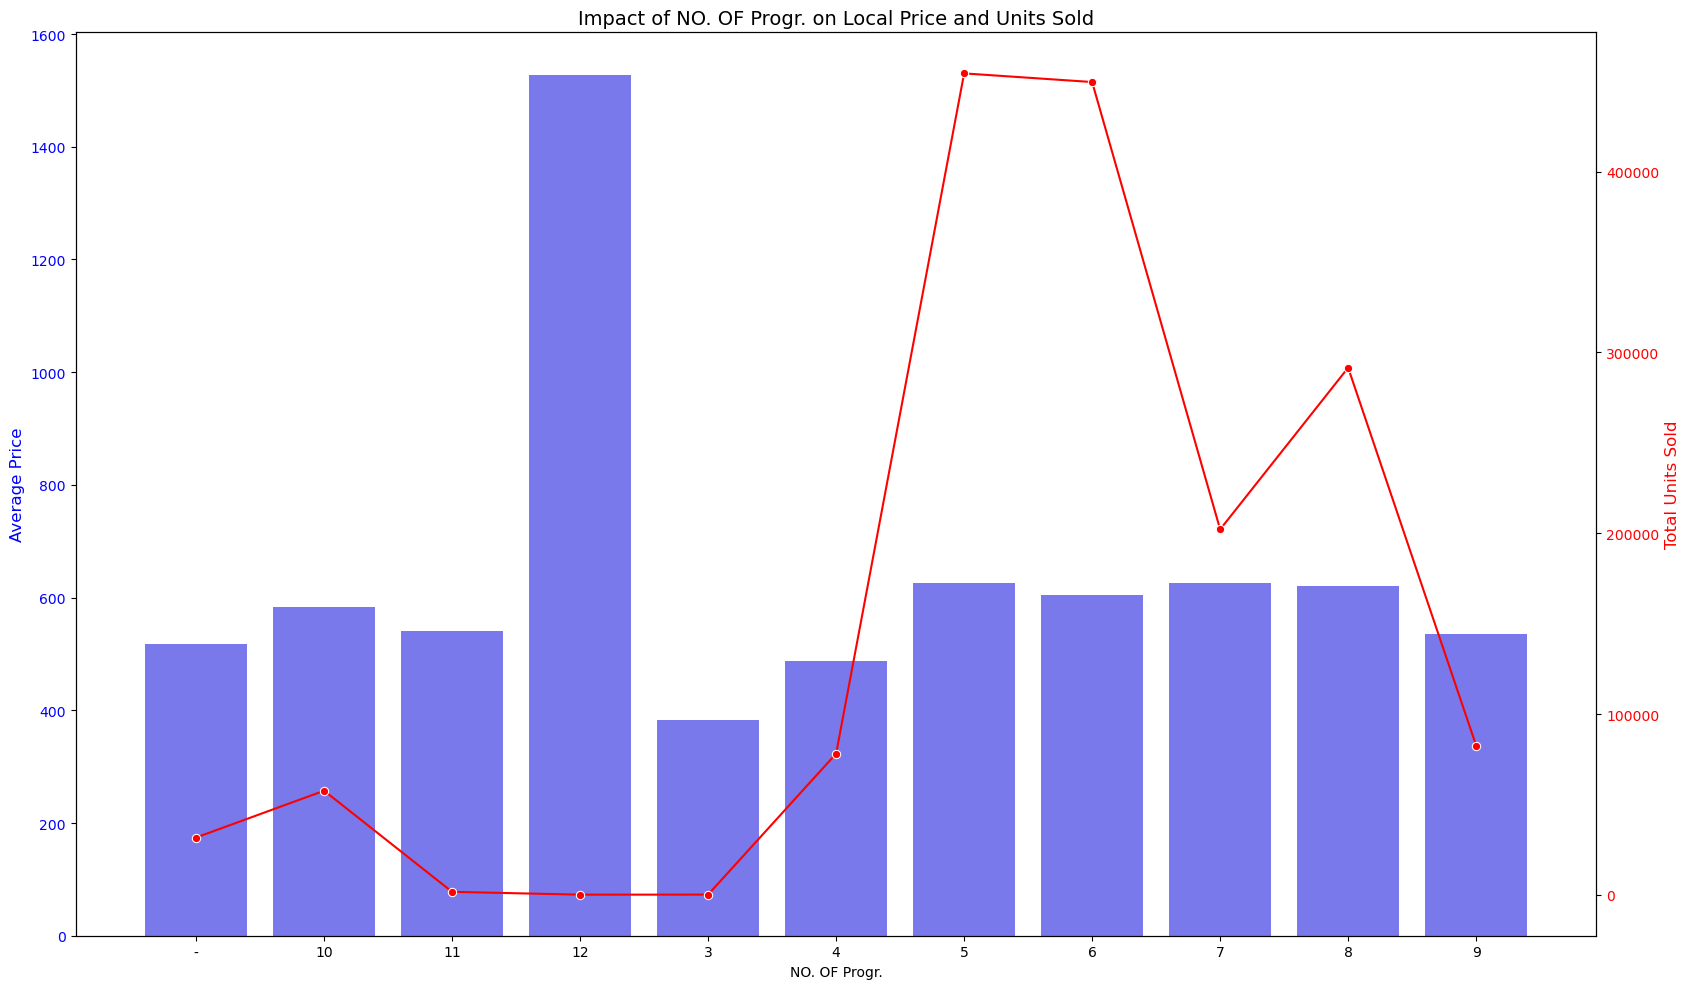

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# the top 7 features
top_7_features = ["Price", "Season", "RUN Time", "En.Cons.100cy", "Noise Level DB", "Brand", "NO. OF Progr." ]

# Loop through each feature
for feature in top_7_features:
    feature_analysis = yeni_copy.groupby(feature).agg(
        average_local_price=("Price", "mean"),
        total_units=("Units", "sum")
    ).reset_index()

    # Convert Brand to string and sort
    if feature == "Brand":
        feature_analysis["Brand"] = feature_analysis["Brand"].astype(str)
        feature_analysis = feature_analysis.sort_values("Brand")  # Ensure order

    # Plot
    fig, ax1 = plt.subplots(figsize=(17, 10))

    # Barplot for Average Local Price
    sns.barplot(data=feature_analysis, x=feature, y="average_local_price", ax=ax1, color="blue", alpha=0.6)
    ax1.set_ylabel("Average Price", color="blue", fontsize=12)
    ax1.tick_params(axis="y", labelcolor="blue")

    # Line plot for Total Units Sold
    ax2 = ax1.twinx()
    sns.lineplot(data=feature_analysis, x=feature, y="total_units", ax=ax2, color="red", marker="o")
    ax2.set_ylabel("Total Units Sold", color="red", fontsize=12)
    ax2.tick_params(axis="y", labelcolor="red")

    # **Fix Brand Labels**
    if feature == "Brand":
        ax1.set_xticks(range(len(feature_analysis["Brand"])))  # Ensure correct tick positions
        ax1.set_xticklabels(feature_analysis["Brand"], rotation=45, ha="right")  # Rotate for readability

    # Titles and Layout
    plt.title(f"Impact of {feature} on Local Price and Units Sold", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.tight_layout()
    plt.show()


# Forecasting w/ Random Forest, Feature Importance

Shape of X: (7974, 31)
Shape of y: (7974,)
✅ DEBUG: Dataset date range
 - Min: 2023-01-01 00:00:00
 - Max: 2025-01-01 00:00:00
 - Train rows: 7006
 - Test rows: 968
Mean Absolute Error: 71.91036463842974
Root Mean Squared Error: 136.1950577675169
R-squared Score: 0.6990449315672709


C:\plm\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


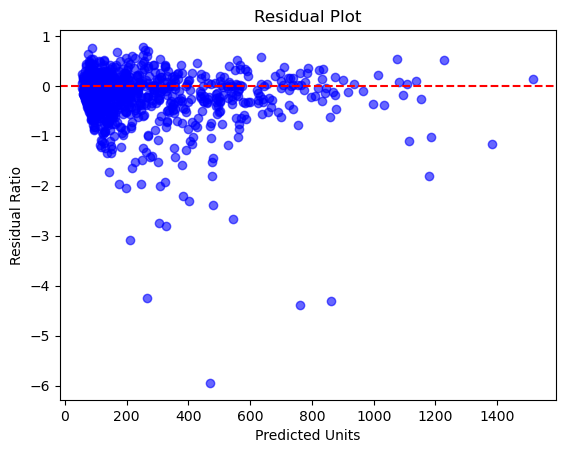

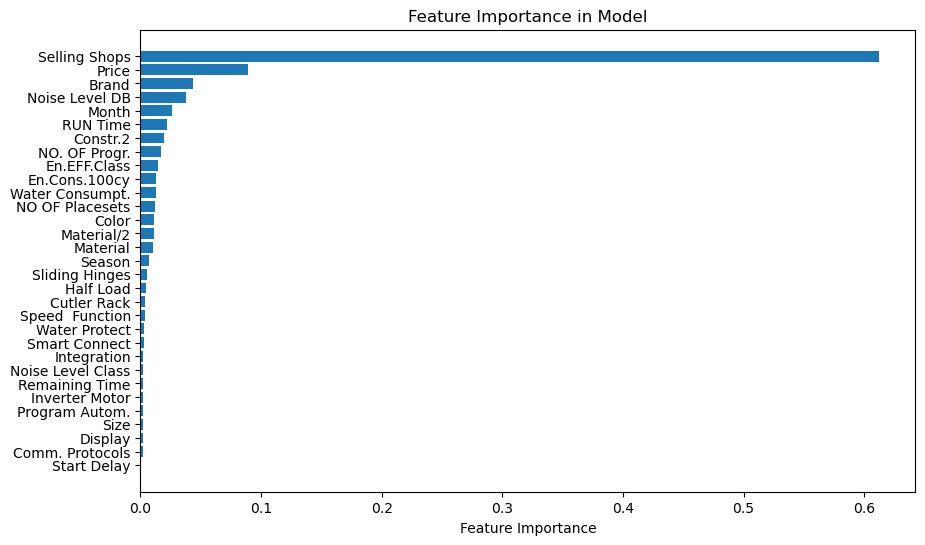

Cross-Validation R2 Scores: [0.70304459 0.81787124 0.81592468 0.77678842 0.68670946]
Mean Cross-Validation R2 Score: 0.7600676772585948


In [57]:
# /main/random_forest_model.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

categorical_columns = ['Noise Level Class', 'RUN Time', 'En.Cons.100cy', 'En.EFF.Class',
                       'Color', 'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display',
                       'Half Load', 'Integration', 'Inverter Motor', 'Material', 'Material/2',
                       'NO OF Placesets', 'NO. OF Progr.', 'Noise Level DB', 'Program Autom.',
                       'Remaining Time', 'Size', 'Sliding Hinges', 'Smart Connect',
                       'Speed  Function', 'Start Delay', 'Water Consumpt.', 'Water Protect',
                       'Month', 'Brand', 'Season']

numerical_features = ["Price","Selling Shops"]
all_features = categorical_columns + numerical_features

yeni["Month"] = yeni["Period"].dt.month

# Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    yeni[col] = le.fit_transform(yeni[col].astype(str))
    label_encoders[col] = le

X = yeni[all_features]
y = yeni["Units"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Use earlier split date to ensure enough test samples
split_date = pd.Timestamp("2024-10-01")
train = yeni[yeni["Period"] < split_date]
test = yeni[yeni["Period"] >= split_date]

print("✅ DEBUG: Dataset date range")
print(" - Min:", yeni["Period"].min())
print(" - Max:", yeni["Period"].max())
print(" - Train rows:", train.shape[0])
print(" - Test rows:", test.shape[0])

# Final X/y split
X_train, y_train = train[all_features], train["Units"]
X_test, y_test = test[all_features], test["Units"]

# Train
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

# Residual plot
residuals = (y_test - y_pred) / y_test
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Units")
plt.ylabel("Residual Ratio")
plt.show()

# Feature importances
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Model")
plt.gca().invert_yaxis()
plt.show()

# Cross-validation on full dataset
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring="r2")
print(f"Cross-Validation R2 Scores: {cross_val_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cross_val_scores)}")

# Model Optimization: Hypermeter Tuning

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# optimized but smaller search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

# Use time-based CV
tscv = TimeSeriesSplit(n_splits=3)

# Randomized search with efficient grid
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=15,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

# Best model and parameters
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Optimized MAE: {mae:.2f}")
print(f"Optimized RMSE: {rmse:.2f}")
print(f"Optimized R²: {r2:.2f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Optimized MAE: 70.98
Optimized RMSE: 137.04
Optimized R²: 0.70


C:\plm\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Forecasting w/ LightGBM

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lg
import matplotlib.pyplot as plt

X_train['Price'] = pd.to_numeric(X_train['Price'], errors='coerce')

lg_model = lg.LGBMRegressor(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [10, 20, 30]
}

grid_search = GridSearchCV(
    estimator=lg_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("\nBest Parameters from Grid Search (LightGBM):")
print(best_params)

C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\1991617300.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Price'] = pd.to_numeric(X_train['Price'], errors='coerce')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\plm\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\plm\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 7006, number of used features: 31
[LightGBM] [Info] Start training from score 203.696487

Best Parameters from Grid Search (LightGBM):
{'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 100, 'num_leaves': 100}


In [62]:
best_lg_model = grid_search.best_estimator_
best_lg_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 7006, number of used features: 31
[LightGBM] [Info] Start training from score 203.696487


LGBMRegressor(min_child_samples=10, num_leaves=100, random_state=42)

In [65]:
#PREDICTING
X_test['Price'] = pd.to_numeric(X_test['Price'], errors='coerce')
y_pred = best_lg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 71.5807
R² Score: 0.7125


C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\104473992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Price'] = pd.to_numeric(X_test['Price'], errors='coerce')


# Forecasting w/ HistGradientBoosting, Actual Data (Feb. 2025)

In [80]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [76]:
month_mapping = {
    'Jan.': 1, 'Feb.': 2, 'Mar.': 3, 'Apr.': 4, 'May.': 5, 'Jun.': 6,
    'Jul.': 7, 'Aug.': 8, 'Sep.': 9, 'Oct.': 10, 'Nov.': 11, 'Dec.': 12
}

# Function to map month abbreviations to their respective month numbers
def map_month(month_str):
    # Extract the month abbreviation and return the corresponding number using the dictionary
    month_abbr = month_str.split()[0]  # e.g., "Feb." or "Jan."
    return month_mapping.get(month_abbr, None)  # Return None if the month abbreviation is not found

feb_actuals_df = pd.read_excel('Dishwashers in France-Feb 2025-with units.xlsx')
feb_features_df = pd.read_excel('Dishwashers in France-Feb 2025-without units.xlsx')
train_df = pd.read_excel('France 2023-2024-2025January.xlsx')

feb_actuals_df['Month'] = feb_actuals_df['Period'].apply(lambda x: map_month(str(x)))
feb_features_df['Month'] = feb_features_df['Period'].apply(lambda x: map_month(str(x)))
train_df['Month'] = train_df['Period'].apply(lambda x: map_month(str(x)))

print(feb_actuals_df[['Period', 'Month']].head())
print(feb_features_df[['Period', 'Month']].head())
print(train_df[['Period', 'Month']].head())

# Feature engineering
def get_season(date):
    if pd.isnull(date): return None
    m = date.month
    return 'Winter' if m in [12, 1, 2] else 'Spring' if m in [3, 4, 5] else 'Summer' if m in [6, 7, 8] else 'Fall'

for df in [train_df, feb_features_df, feb_actuals_df]:
    df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
    df['Season'] = df['Period'].apply(get_season)
    df['Brand'] = df['Model Name'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)

numerical_features = ['Average Price','Selling Shops']
categorical_columns = ['Noise Level Class', 'RUN Time', 'En.Cons.100cy', 'En.EFF.Class', 'Color',
                       'Comm. Protocols', 'Constr.2', 'Cutler Rack', 'Display', 'Half Load', 'Integration',
                       'Inverter Motor', 'Material', 'Material/2', 'NO OF Placesets', 'NO. OF Progr.',
                       'Noise Level DB', 'Program Autom.', 'Remaining Time', 'Size', 'Sliding Hinges',
                       'Smart Connect', 'Speed  Function', 'Start Delay', 'Water Consumpt.', 'Water Protect',
                       'Month', 'Brand', 'Season']
all_features = categorical_columns + numerical_features

      Period  Month
0  Feb. 2025      2
1  Feb. 2025      2
2  Feb. 2025      2
3  Feb. 2025      2
4  Feb. 2025      2
      Period  Month
0  Feb. 2025      2
1  Feb. 2025      2
2  Feb. 2025      2
3  Feb. 2025      2
4  Feb. 2025      2
      Period  Month
0  Jan. 2023    1.0
1  Jan. 2023    1.0
2  Jan. 2023    1.0
3  Jan. 2023    1.0
4  Jan. 2023    1.0


C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\2114955767.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Period'] = pd.to_datetime(df['Period'], errors='coerce')


In [77]:
# Clean + encode training data
train_df = train_df[train_df['Units'] >= 0]
train_df['Units'] = np.clip(train_df['Units'], 0, 500)
train_df[numerical_features] = train_df[numerical_features].replace(['-', 'n.a.'], np.nan).astype(float)
feb_features_df[numerical_features] = feb_features_df[numerical_features].replace(['-', 'n.a.'], np.nan).astype(float)

train_df = train_df.dropna(subset=all_features + ['Units'])

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    label_encoders[col] = le
    if col in feb_features_df.columns:
        valid_classes = set(le.classes_)
        most_common = le.classes_[0]
        feb_features_df[col] = feb_features_df[col].astype(str).apply(lambda x: x if x in valid_classes else most_common)
        feb_features_df[col] = le.transform(feb_features_df[col])

C:\Users\26097879\AppData\Local\Temp\ipykernel_6332\2488421162.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[numerical_features] = train_df[numerical_features].replace(['-', 'n.a.'], np.nan).astype(float)


In [78]:
X_train = train_df[all_features]
y_train = train_df['Units']
X_feb = feb_features_df[all_features]

model = HistGradientBoostingRegressor(
    max_iter=450, learning_rate=0.19, max_depth=8,
    min_samples_leaf=12, l2_regularization=0.1, random_state=42
)
model.fit(X_train, y_train)
feb_features_df['Predicted Units'] = model.predict(X_feb)

**EVALUATION ON ACTUAL DATA FORECASTING**

In [79]:
# Evaluation
evaluation_df = pd.merge(
    feb_features_df,
    feb_actuals_df[['Model Name', 'Period', 'Units']],
    on=['Model Name', 'Period'],
    how='inner'
)

mae = mean_absolute_error(evaluation_df['Units'], evaluation_df['Predicted Units'])
rmse = mean_squared_error(evaluation_df['Units'], evaluation_df['Predicted Units'], squared=False)
r2 = r2_score(evaluation_df['Units'], evaluation_df['Predicted Units'])

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 56.40
RMSE: 93.17
R²: 0.73


C:\plm\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
